## Load and Preview Dataset

We begin by loading the BLS dataset and inspecting its structure. This helps us understand the available columns, identify relevant features, and determine how to clean or transform the data for analysis.

In [1]:
import pandas as pd

# Load the dataset
file_path = "all_data_M_2024.xlsx"
bls_df = pd.read_excel(file_path)

# Preview first few rows
bls_df.head()

AREA AREA_TITLE  AREA_TYPE PRIM_STATE   NAICS     NAICS_TITLE  \
0    99       U.S.          1         US  000000  Cross-industry   
1    99       U.S.          1         US  000000  Cross-industry   
2    99       U.S.          1         US  000000  Cross-industry   
3    99       U.S.          1         US  000000  Cross-industry   
4    99       U.S.          1         US  000000  Cross-industry   

          I_GROUP  OWN_CODE OCC_CODE               OCC_TITLE  ... H_MEDIAN  \
0  cross-industry      1235  00-0000         All Occupations  ...     23.8   
1  cross-industry      1235  11-0000  Management Occupations  ...     58.7   
2  cross-industry      1235  11-1000          Top Executives  ...    50.48   
3  cross-industry      1235  11-1010        Chief Executives  ...    99.24   
4  cross-industry      1235  11-1011        Chief Executives  ...    99.24   

  H_PCT75 H_PCT90 A_PCT10 A_PCT25 A_MEDIAN A_PCT75 A_PCT90 ANNUAL HOURLY  
0   37.89   60.44   29990   36730    49500   78810  125720    NaN    NaN  
1    82.5       #   57010   79900   122090  171610       #    NaN    NaN  
2   81.01       #   47510   68800   104990  168490       #    NaN    NaN  
3       #       #   73710  126080   206420       #       #    NaN    NaN  
4       #       #   73710  126080   206420       #       #    NaN    NaN  

[5 rows x 32 columns]

In [2]:
# List all sheet names
pd.ExcelFile(file_path).sheet_names

['All May 2024 data', 'Field Descriptions', 'UpdateTime', 'Filler']

In [3]:
bls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409517 entries, 0 to 409516
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          409517 non-null  int64 
 1   AREA_TITLE    409517 non-null  object
 2   AREA_TYPE     409517 non-null  int64 
 3   PRIM_STATE    409517 non-null  object
 4   NAICS         409517 non-null  object
 5   NAICS_TITLE   409517 non-null  object
 6   I_GROUP       409517 non-null  object
 7   OWN_CODE      409517 non-null  int64 
 8   OCC_CODE      409517 non-null  object
 9   OCC_TITLE     409517 non-null  object
 10  O_GROUP       409517 non-null  object
 11  TOT_EMP       409517 non-null  object
 12  EMP_PRSE      409517 non-null  object
 13  JOBS_1000     231693 non-null  object
 14  LOC_QUOTIENT  231693 non-null  object
 15  PCT_TOTAL     170758 non-null  object
 16  PCT_RPT       170758 non-null  object
 17  H_MEAN        409517 non-null  object
 18  A_MEAN        409517 non

### Understanding OCC_CODE Categories (SOC Major Groups)

The `OCC_CODE` field in the BLS dataset follows the **Standard Occupational Classification (SOC)** system. The **first two digits** indicate the **major occupational group**. These categories help classify and analyze labor data across all industries.

Below is the complete list of **23 SOC Major Groups**, along with example roles and general fields:

| OCC_CODE Prefix | Major Occupational Group                                      | Common Fields / Example Roles                            |
|-----------------|---------------------------------------------------------------|-----------------------------------------------------------|
| **11**          | Management Occupations                                        | Executives, Project Managers, Operations Directors        |
| **13**          | Business and Financial Operations Occupations                 | Financial Analysts, HR Specialists, Compliance Officers   |
| **15**          | Computer and Mathematical Occupations                         | Software Developers, Data Scientists, Statisticians       |
| **17**          | Architecture and Engineering Occupations                      | Civil Engineers, Mechanical Engineers, Systems Architects |
| **19**          | Life, Physical, and Social Science Occupations                | Chemists, Economists, Environmental Scientists            |
| **21**          | Community and Social Service Occupations                      | Social Workers, Counselors, Health Educators              |
| **23**          | Legal Occupations                                              | Lawyers, Paralegals, Judges                               |
| **25**          | Education, Training, and Library Occupations                  | Teachers, Librarians, Instructional Designers             |
| **27**          | Arts, Design, Entertainment, Sports, and Media Occupations    | UX Designers, Journalists, Musicians                      |
| **29**          | Healthcare Practitioners and Technical Occupations            | Physicians, Registered Nurses, Medical Technologists      |
| **31**          | Healthcare Support Occupations                                | Medical Assistants, Home Health Aides                     |
| **33**          | Protective Service Occupations                                | Police Officers, Firefighters, Security Guards            |
| **35**          | Food Preparation and Serving Related Occupations              | Chefs, Cooks, Servers                                     |
| **37**          | Building and Grounds Cleaning and Maintenance Occupations     | Janitors, Groundskeepers, Pest Control Workers            |
| **39**          | Personal Care and Service Occupations                         | Childcare Workers, Hairstylists, Fitness Trainers         |
| **41**          | Sales and Related Occupations                                 | Retail Salespersons, Real Estate Agents, Sales Engineers  |
| **43**          | Office and Administrative Support Occupations                 | Administrative Assistants, Clerks, Dispatchers            |
| **45**          | Farming, Fishing, and Forestry Occupations                    | Agricultural Workers, Fishers, Loggers                    |
| **47**          | Construction and Extraction Occupations                       | Carpenters, Electricians, Heavy Equipment Operators        |
| **49**          | Installation, Maintenance, and Repair Occupations             | Mechanics, HVAC Technicians, IT Repair Specialists        |
| **51**          | Production Occupations                                        | Assemblers, Machinists, Tool Operators                    |
| **53**          | Transportation and Material Moving Occupations                | Truck Drivers, Pilots, Package Handlers                   |
| **55**          | Military Specific Occupations                                 | Enlisted Personnel, Officers, Combat Roles                |

This classification is helpful for:
- Grouping similar occupations
- Understanding trends by category
- Feature engineering (e.g., using `OCC_MAJOR` in modeling)

**Reference**: [Bureau of Labor Statistics – SOC Major Groups](https://www.bls.gov/soc/2018/major_groups.htm)

### Combined Filtering by SOC Group and Tech Keywords

To create a clean, tech-focused dataset, we applied two layers of filtering:
1. **SOC Group Filtering**: We retained only major occupation groups relevant to tech, such as Computer & Mathematical, Engineering, and IT Management (OCC_CODE prefixes 11, 13, 15, 17, etc.).
2. **Keyword Filtering**: We further filtered job titles using tech-related keywords such as “developer,” “engineer,” “data,” “IT,” and “cyber.”

This dual-filter approach ensures our model is trained on relevant job types while excluding unrelated roles from other industries.

In [4]:
import re

# List of keywords commonly found in tech-related occupations
tech_keywords = r'\b(?:software|developer|computer|data|it|information|technology|programmer|engineer|web|cyber|network|systems|cloud|security|analyst|devops|ai|ml|machine learning)\b'

In [5]:
# Extract OCC_MAJOR (first 2 digits of OCC_CODE)
bls_df['OCC_MAJOR'] = bls_df['OCC_CODE'].astype(str).str[:2]

# Keep only rows where OCC_MAJOR is tech-relevant
tech_major_codes = ['11', '13', '15', '17', '19', '27', '41', '49', '51']
filtered_by_group = bls_df[bls_df['OCC_MAJOR'].isin(tech_major_codes)]

# Now apply keyword filtering on OCC_TITLE
filtered_tech_df = filtered_by_group[
    filtered_by_group['OCC_TITLE'].str.lower().str.contains(tech_keywords, regex=True, na=False)
]

# Exclude unrelated titles manually
excluded_keywords = r'\b(?:assembler|rigging|machinist|mechanic|welder|fabricator|operator|repairer|driller|inspector)\b'

filtered_tech_df = filtered_tech_df[
    ~filtered_tech_df['OCC_TITLE'].str.lower().str.contains(excluded_keywords, regex=True, na=False)
]

print(f"Filtered down to {filtered_tech_df.shape[0]} rows after applying SOC group and keyword filters.")

Filtered down to 17398 rows after applying SOC group and keyword filters.


In [6]:
filtered_tech_df.head()

AREA AREA_TITLE  AREA_TYPE PRIM_STATE   NAICS     NAICS_TITLE  \
22     99       U.S.          1         US  000000  Cross-industry   
23     99       U.S.          1         US  000000  Cross-industry   
132    99       U.S.          1         US  000000  Cross-industry   
133    99       U.S.          1         US  000000  Cross-industry   
134    99       U.S.          1         US  000000  Cross-industry   

            I_GROUP  OWN_CODE OCC_CODE  \
22   cross-industry      1235  11-3020   
23   cross-industry      1235  11-3021   
132  cross-industry      1235  15-0000   
133  cross-industry      1235  15-1200   
134  cross-industry      1235  15-1210   

                                     OCC_TITLE  ... H_PCT75 H_PCT90 A_PCT10  \
22   Computer and Information Systems Managers  ...  103.95       #  104450   
23   Computer and Information Systems Managers  ...  103.95       #  104450   
132      Computer and Mathematical Occupations  ...   70.51   86.59   54100   
133                       Computer Occupations  ...   70.78   86.59   53340   
134          Computer and Information Analysts  ...   65.96   81.76   64450   

    A_PCT25 A_MEDIAN A_PCT75 A_PCT90 ANNUAL HOURLY OCC_MAJOR  
22   134350   171200  216220       #    NaN    NaN        11  
23   134350   171200  216220       #    NaN    NaN        11  
132   76350   105850  146650  180110    NaN    NaN        15  
133   76180   105990  147220  180110    NaN    NaN        15  
134   82550   106890  137190  170060    NaN    NaN        15  

[5 rows x 33 columns]

In [7]:
filtered_tech_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17398 entries, 22 to 406768
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AREA          17398 non-null  int64 
 1   AREA_TITLE    17398 non-null  object
 2   AREA_TYPE     17398 non-null  int64 
 3   PRIM_STATE    17398 non-null  object
 4   NAICS         17398 non-null  object
 5   NAICS_TITLE   17398 non-null  object
 6   I_GROUP       17398 non-null  object
 7   OWN_CODE      17398 non-null  int64 
 8   OCC_CODE      17398 non-null  object
 9   OCC_TITLE     17398 non-null  object
 10  O_GROUP       17398 non-null  object
 11  TOT_EMP       17398 non-null  object
 12  EMP_PRSE      17398 non-null  object
 13  JOBS_1000     8321 non-null   object
 14  LOC_QUOTIENT  8321 non-null   object
 15  PCT_TOTAL     8889 non-null   object
 16  PCT_RPT       8889 non-null   object
 17  H_MEAN        17398 non-null  object
 18  A_MEAN        17398 non-null  object
 19  MEAN_PR

In [8]:
filtered_tech_df['OCC_TITLE'].nunique()

29

In [9]:
sorted(filtered_tech_df['OCC_TITLE'].dropna().unique())[:29]

['Computer Hardware Engineers',
 'Computer Network Architects',
 'Computer Network Support Specialists',
 'Computer Numerically Controlled Tool Operators',
 'Computer Numerically Controlled Tool Operators and Programmers',
 'Computer Numerically Controlled Tool Programmers',
 'Computer Occupations',
 'Computer Occupations, All Other',
 'Computer Programmers',
 'Computer Support Specialists',
 'Computer Systems Analysts',
 'Computer User Support Specialists',
 'Computer and Information Analysts',
 'Computer and Information Research Scientists',
 'Computer and Information Systems Managers',
 'Computer and Mathematical Occupations',
 'Computer, Automated Teller, and Office Machine Repairers',
 'Data Scientists',
 'Database and Network Administrators and Architects',
 'Electronics Engineers, Except Computer',
 'Information Security Analysts',
 'Miscellaneous Computer Occupations',
 'Network and Computer Systems Administrators',
 'Security and Fire Alarm Systems Installers',
 'Software Deve

### Identifying Missing Values

Before moving forward with modeling, it's important to understand where missing data exists in our tech-filtered dataset. This step helps us decide whether to drop rows, impute values, or take other precautions to avoid skewed results.

In [10]:
# Count missing values in each column
missing_summary = filtered_tech_df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]

HOURLY          17398
ANNUAL          17398
LOC_QUOTIENT     9077
JOBS_1000        9077
PCT_RPT          8509
PCT_TOTAL        8509
dtype: int64

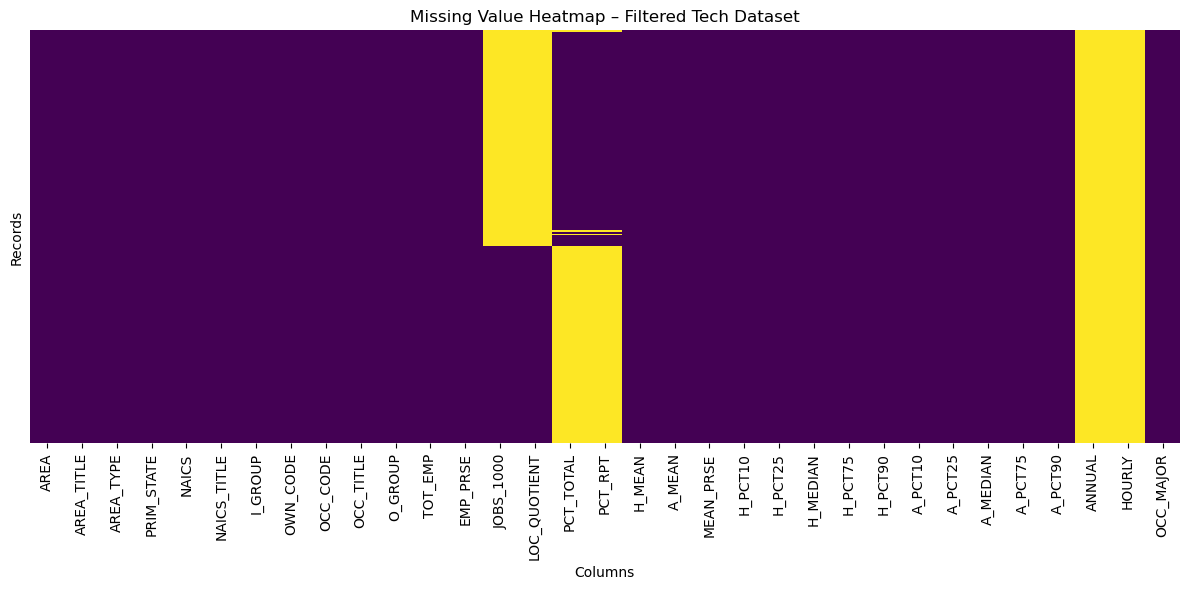

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values in the main filtered DataFrame
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_tech_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap – Filtered Tech Dataset')
plt.xlabel('Columns')
plt.ylabel('Records')
plt.tight_layout()
plt.show()

### Missing Value Summary

We found that a handful of columns have missing values, most notably:
- `HOURLY` and `ANNUAL`: missing in **100%** of rows (these may be placeholder or deprecated columns)
- `LOC_QUOTIENT`, `JOBS_1000`, `PCT_RPT`, and `PCT_TOTAL`: missing in ~50% of rows

These fields are primarily used for **contextual labor metrics** rather than salary prediction and may be candidates for removal.

In [12]:
# Calculate percentage of missing values for each column
missing_percent = (filtered_tech_df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent[missing_percent > 0]

HOURLY          100.000000
ANNUAL          100.000000
LOC_QUOTIENT     52.172664
JOBS_1000        52.172664
PCT_RPT          48.907920
PCT_TOTAL        48.907920
dtype: float64

### Interpreting Missing Value Percentages

The `HOURLY` and `ANNUAL` columns are entirely empty (100% missing), suggesting they are either deprecated or irrelevant for this dataset release. The `LOC_QUOTIENT`, `JOBS_1000`, `PCT_RPT`, and `PCT_TOTAL` fields are missing in roughly 50% of the data and are mostly auxiliary labor market indicators.

These columns are not directly tied to our salary prediction target (`A_MEDIAN`), so removing them — or the rows they appear in — is unlikely to significantly impact the core model performance.

In [13]:
# Store original row count
original_count = filtered_tech_df.shape[0]

# Drop rows with any missing values
tech_df_cleaned = filtered_tech_df.dropna()

# Report how much data was dropped
cleaned_count = tech_df_cleaned.shape[0]
print(f"Original: {original_count} rows")
print(f"After dropping nulls: {cleaned_count} rows")
print(f"Rows dropped: {original_count - cleaned_count} ({(original_count - cleaned_count)/original_count:.2%})")

Original: 17398 rows
After dropping nulls: 0 rows
Rows dropped: 17398 (100.00%)


### Strategy Update: Column-Wise Cleaning First

Dropping all rows with missing values would eliminate the entire dataset. This is because two unused columns — `HOURLY` and `ANNUAL` — are 100% missing.

Since these columns are not used in our salary prediction task, we will drop them from the dataset first. This allows us to then evaluate missing values in the remaining, more relevant fields without losing all our data.

In [14]:
# Drop unused columns that are 100% missing
tech_df_cleaned = filtered_tech_df.drop(columns=['HOURLY', 'ANNUAL'])

# Check remaining missing values
tech_df_cleaned.isnull().sum()

AREA               0
AREA_TITLE         0
AREA_TYPE          0
PRIM_STATE         0
NAICS              0
NAICS_TITLE        0
I_GROUP            0
OWN_CODE           0
OCC_CODE           0
OCC_TITLE          0
O_GROUP            0
TOT_EMP            0
EMP_PRSE           0
JOBS_1000       9077
LOC_QUOTIENT    9077
PCT_TOTAL       8509
PCT_RPT         8509
H_MEAN             0
A_MEAN             0
MEAN_PRSE          0
H_PCT10            0
H_PCT25            0
H_MEDIAN           0
H_PCT75            0
H_PCT90            0
A_PCT10            0
A_PCT25            0
A_MEDIAN           0
A_PCT75            0
A_PCT90            0
OCC_MAJOR          0
dtype: int64

### Final Cleaning: Dropping Contextual Columns with Missing Values

After removing the 100% missing columns (`HOURLY`, `ANNUAL`), we reviewed the remaining null values. Only four columns still had missing data: `JOBS_1000`, `LOC_QUOTIENT`, `PCT_TOTAL`, and `PCT_RPT`.

These are contextual labor metrics not required for our salary prediction task. To preserve data integrity and avoid row-level loss, we opted to drop these columns rather than impute or remove rows.

In [15]:
# Drop remaining columns with missing values (not essential for modeling)
cols_to_drop = ['JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT']
tech_df_cleaned = tech_df_cleaned.drop(columns=cols_to_drop)

# Confirm no missing values remain
tech_df_cleaned.isnull().sum().sum()

0

### Validating Dataset Integrity After Cleaning

Now that we’ve dropped non-essential columns with missing data, we compare the cleaned dataset to the original filtered version. We focus on the distribution of salaries and the diversity of job titles to ensure we didn’t unintentionally lose valuable information.

In [16]:
print("Unique job titles before cleaning:", filtered_tech_df['OCC_TITLE'].nunique())
print("Unique job titles after cleaning:", tech_df_cleaned['OCC_TITLE'].nunique())

Unique job titles before cleaning: 29
Unique job titles after cleaning: 29


In [17]:
# Ensure A_MEDIAN is numeric
filtered_tech_df['A_MEDIAN'] = pd.to_numeric(filtered_tech_df['A_MEDIAN'], errors='coerce')
tech_df_cleaned['A_MEDIAN'] = pd.to_numeric(tech_df_cleaned['A_MEDIAN'], errors='coerce')

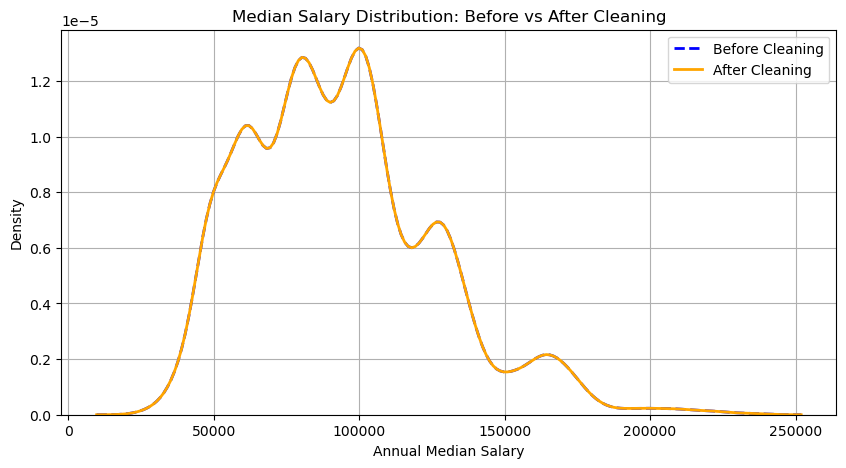

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Before Cleaning - blue dashed line
sns.kdeplot(
    filtered_tech_df['A_MEDIAN'].dropna(),
    label='Before Cleaning',
    color='blue',
    linestyle='--',
    linewidth=2
)

# After Cleaning - orange solid line
sns.kdeplot(
    tech_df_cleaned['A_MEDIAN'].dropna(),
    label='After Cleaning',
    color='orange',
    linestyle='-',
    linewidth=2
)

plt.title('Median Salary Distribution: Before vs After Cleaning')
plt.xlabel('Annual Median Salary')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Salary Distribution Comparison: Before vs After Cleaning

To validate our data cleaning steps, we compared the distribution of median annual salaries (`A_MEDIAN`) before and after removing non-essential columns with missing values.

As shown in the KDE plot, the shape and range of the distribution remain consistent, confirming that we did not lose valuable salary insights during the cleaning process. This reassures us that our dataset is still representative and suitable for modeling.

In [19]:
# Drop rows where A_MEAN or H_MEAN is missing
tech_df_cleaned = tech_df_cleaned.dropna(subset=['A_MEAN', 'H_MEAN']).reset_index(drop=True)
print("Cleaned tech dataset shape:", tech_df_cleaned.shape)

Cleaned tech dataset shape: (17398, 27)


### Filtering Rows with Missing Wage Data

To ensure meaningful salary analysis, we keep only rows where average annual (`A_MEAN`) and hourly (`H_MEAN`) wage data is available. This reduces the dataset while preserving relevant information.

In [20]:
# quantify how many rows were dropped
rows_dropped = 17398 - 17228
print(f"Rows dropped due to missing A_MEAN: {rows_dropped} ({rows_dropped/17398:.2%})")

Rows dropped due to missing A_MEAN: 170 (0.98%)


A total of 170 rows (about 0.98%) were removed due to missing wage data to ensure the target variable was complete for modeling.

In [21]:
# Drop rows with missing average annual or hourly wage
tech_df_cleaned = tech_df_cleaned.dropna(subset=['A_MEAN', 'H_MEAN']).reset_index(drop=True)

# List of wage-related columns
wage_columns = [
    'A_MEAN', 'H_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]

# Double-check column types (optional)
print(tech_df_cleaned[wage_columns].dtypes)

A_MEAN        object
H_MEAN        object
MEAN_PRSE     object
H_PCT10       object
H_PCT25       object
H_MEDIAN      object
H_PCT75       object
H_PCT90       object
A_PCT10       object
A_PCT25       object
A_MEDIAN     float64
A_PCT75       object
A_PCT90       object
dtype: object


### Wage Columns Converted

All selected wage-related columns have been successfully converted to numeric format. This allows for accurate statistical analysis, plotting, and modeling.

### Distribution of Annual Median Wages
This plot shows the distribution of annual median wages (A_MEDIAN) across tech occupations. It helps identify common salary ranges, skewness, and potential outliers in the dataset.

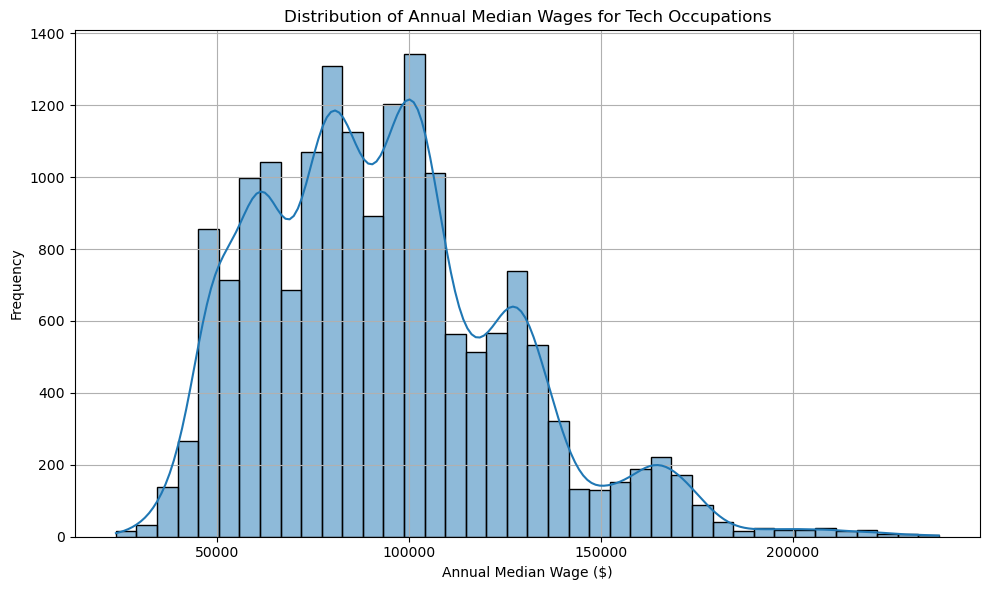

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(tech_df_cleaned['A_MEDIAN'], bins=40, kde=True)
plt.title('Distribution of Annual Median Wages for Tech Occupations')
plt.xlabel('Annual Median Wage ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 15 Highest-Paying Tech Occupations  
This bar chart displays the tech occupations with the highest median annual wages.  
It highlights roles with the most lucrative compensation based on `A_MEDIAN` values aggregated by occupation title.

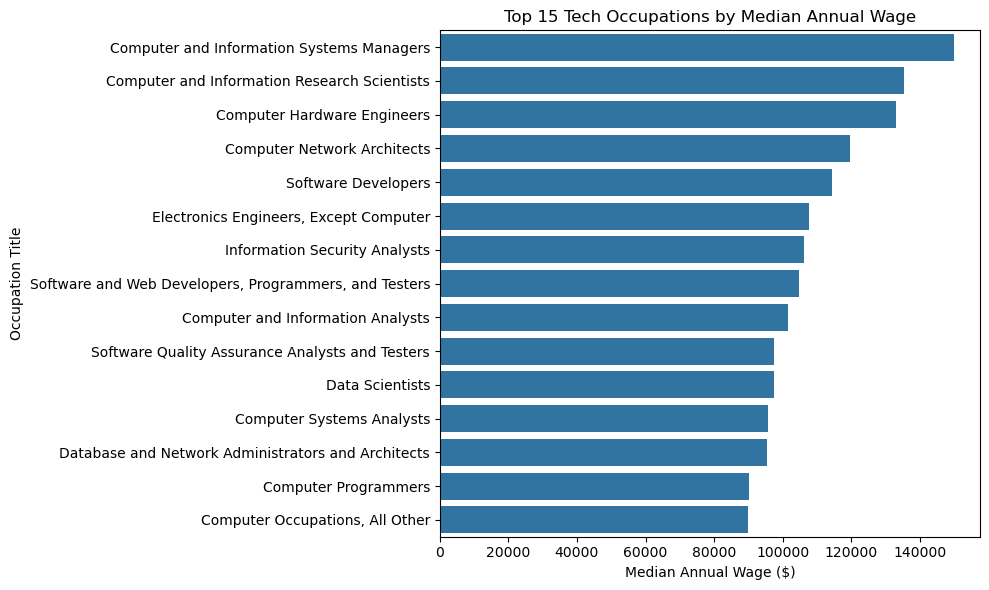

In [23]:
top_jobs = (
    tech_df_cleaned[['OCC_TITLE', 'A_MEDIAN']]
    .groupby('OCC_TITLE')
    .median()
    .sort_values('A_MEDIAN', ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_jobs.index, x=top_jobs['A_MEDIAN'])
plt.title('Top 15 Tech Occupations by Median Annual Wage')
plt.xlabel('Median Annual Wage ($)')
plt.ylabel('Occupation Title')
plt.tight_layout()
plt.show()

### Job Role Distribution

We examine how frequently different tech roles appear in the dataset. This helps us understand which occupations are more represented across the U.S. in the BLS data.

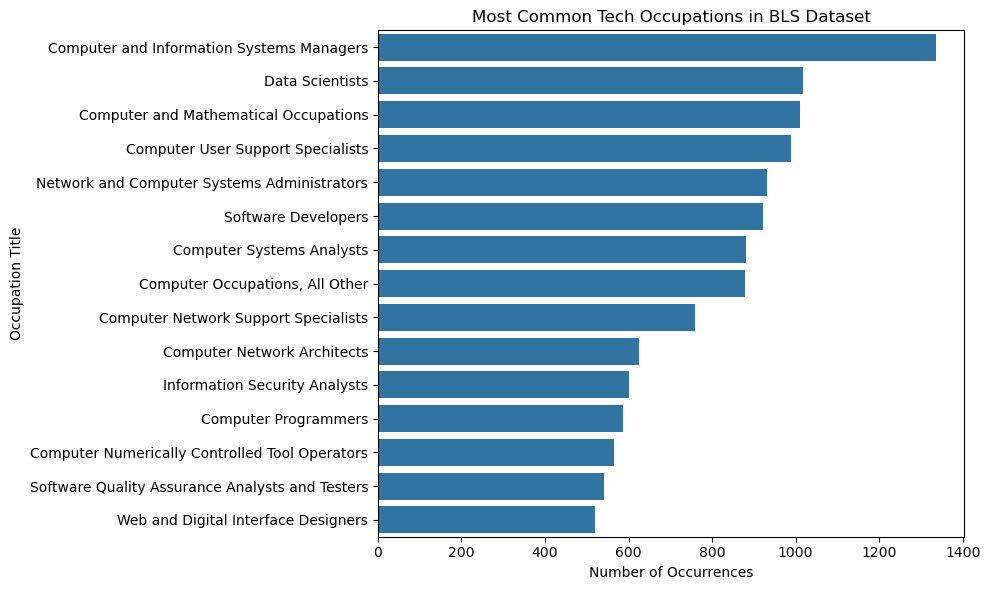

In [24]:
top_roles = (
    tech_df_cleaned['OCC_TITLE']
    .value_counts()
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_roles.index, x=top_roles.values)
plt.title('Most Common Tech Occupations in BLS Dataset')
plt.xlabel('Number of Occurrences')
plt.ylabel('Occupation Title')
plt.tight_layout()
plt.show()

### Salary Distribution by SOC Major Group (Labeled & Sorted)  
This enhanced boxplot replaces numeric SOC codes with descriptive group labels and focuses on higher-paying tech-related categories. Sorting by median wage helps visually compare compensation across these occupational groups.

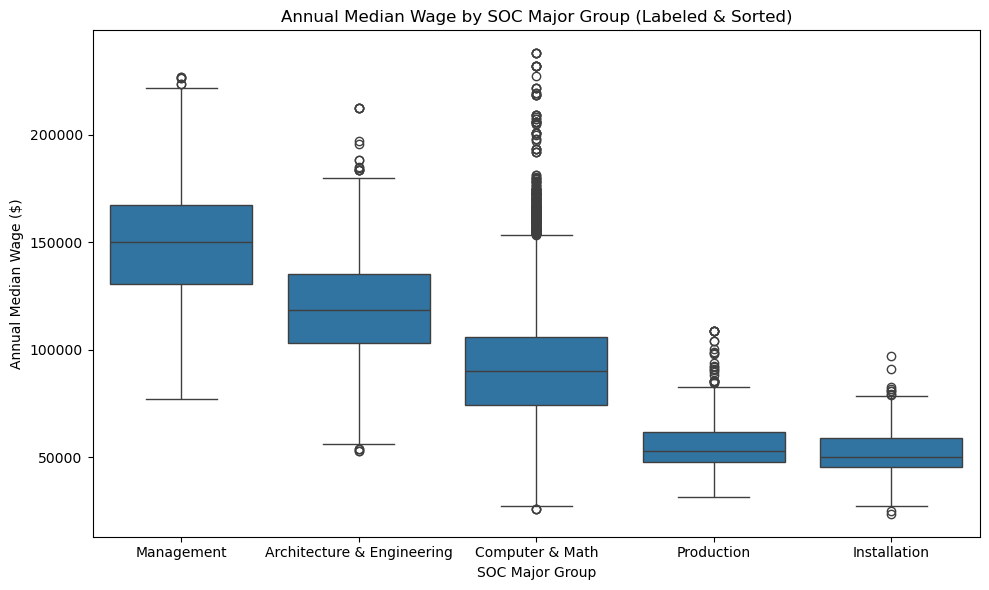

In [25]:
# Map SOC major codes to descriptive group names
soc_labels = {
    '11': 'Management',
    '15': 'Computer & Math',
    '17': 'Architecture & Engineering',
    '49': 'Installation',
    '51': 'Production'
}

# Create a new column with the SOC labels
tech_df_cleaned['SOC_MAJOR'] = tech_df_cleaned['OCC_CODE'].str[:2]
tech_df_cleaned['SOC_LABEL'] = tech_df_cleaned['SOC_MAJOR'].map(soc_labels)

# Filter to just the labeled categories (optional: focus on high-paying groups)
filtered_df = tech_df_cleaned[tech_df_cleaned['SOC_LABEL'].notna()]

# Sort labels by median wage
label_order = (
    filtered_df.groupby('SOC_LABEL')['A_MEDIAN']
    .median()
    .sort_values(ascending=False)
    .index
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='SOC_LABEL', y='A_MEDIAN', order=label_order)
plt.title('Annual Median Wage by SOC Major Group (Labeled & Sorted)')
plt.xlabel('SOC Major Group')
plt.ylabel('Annual Median Wage ($)')
plt.tight_layout()
plt.show()

### Interpretation: Salary Distribution by SOC Major Group  
This boxplot shows how median annual wages (`A_MEDIAN`) vary across SOC major occupational groups. Management (11) and Computer & Mathematical (15) occupations have the highest median wages and widest distributions, indicating both high pay and variability. In contrast, groups like Installation (49) and Production (51) have lower and more compressed wage ranges.

Understanding these differences helps identify which occupational categories drive higher compensation and highlights SOC major group as a valuable feature for salary prediction.

### Regional Salary Trends Across the U.S.  
To examine geographic salary trends, we calculate the average annual wage (`A_MEAN`) for tech roles by state.  
This allows us to compare how tech compensation varies across different regions in the U.S.

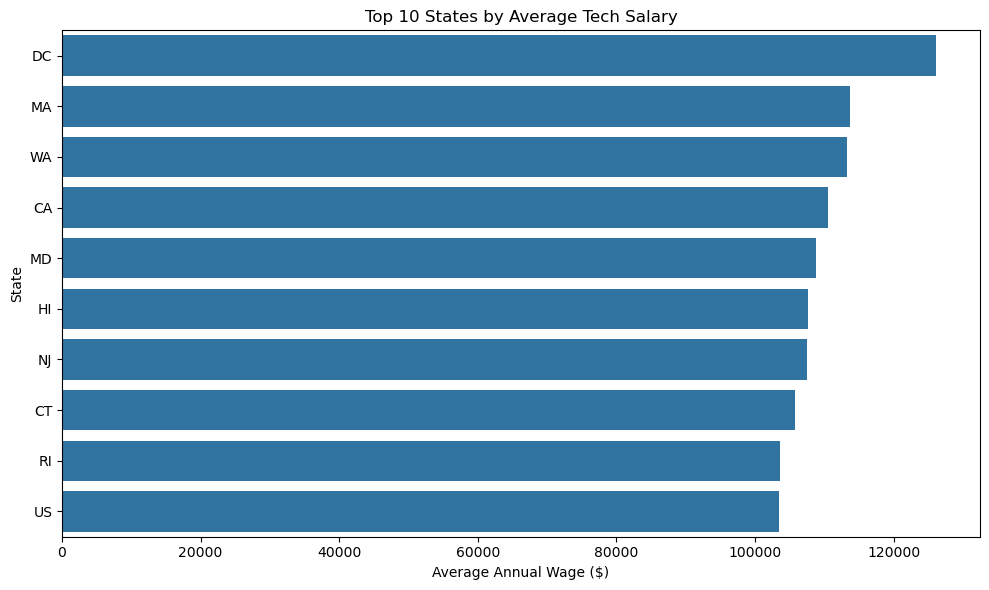

In [26]:
# Calculate average A_MEAN salary by state
# First convert A_MEAN to numeric type, errors='coerce' will convert non-numeric values to NaN
tech_df_cleaned['A_MEAN'] = pd.to_numeric(tech_df_cleaned['A_MEAN'], errors='coerce')

# Now perform the groupby operation
state_salary = (
    tech_df_cleaned.groupby('PRIM_STATE')['A_MEAN']
    .mean()
    .sort_values(ascending=False)
)

# Plot top 10 states by average tech salary
plt.figure(figsize=(10, 6))
sns.barplot(x=state_salary.head(10).values, y=state_salary.head(10).index)
plt.title('Top 10 States by Average Tech Salary')
plt.xlabel('Average Annual Wage ($)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### U.S. Tech Salary Map by State  
This interactive choropleth map visualizes the average annual tech salary (`A_MEAN`) across U.S. states.  
Darker shades represent higher average salaries, allowing easy comparison of regional compensation trends at a glance.

In [27]:
import plotly.express as px
import pandas as pd

# Prepare state-level salary data
state_salary = tech_df_cleaned.groupby('PRIM_STATE')['A_MEAN'].mean().reset_index()
state_salary.columns = ['state', 'average_salary']

# Plot using Plotly
fig = px.choropleth(
    state_salary,
    locations='state',
    locationmode='USA-states',
    color='average_salary',
    scope='usa',
    color_continuous_scale='Blues',
    labels={'average_salary': 'Avg Tech Salary ($)'},
    title='Average Tech Salaries by State (A_MEAN)'
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

### Correlation Between Wage Features  
This heatmap visualizes the correlation between different wage-related columns.  
It helps identify which features are closely related, which is useful for model selection and avoiding multicollinearity.

C:\Users\ggold\AppData\Local\Temp\ipykernel_26156\3801626562.py:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



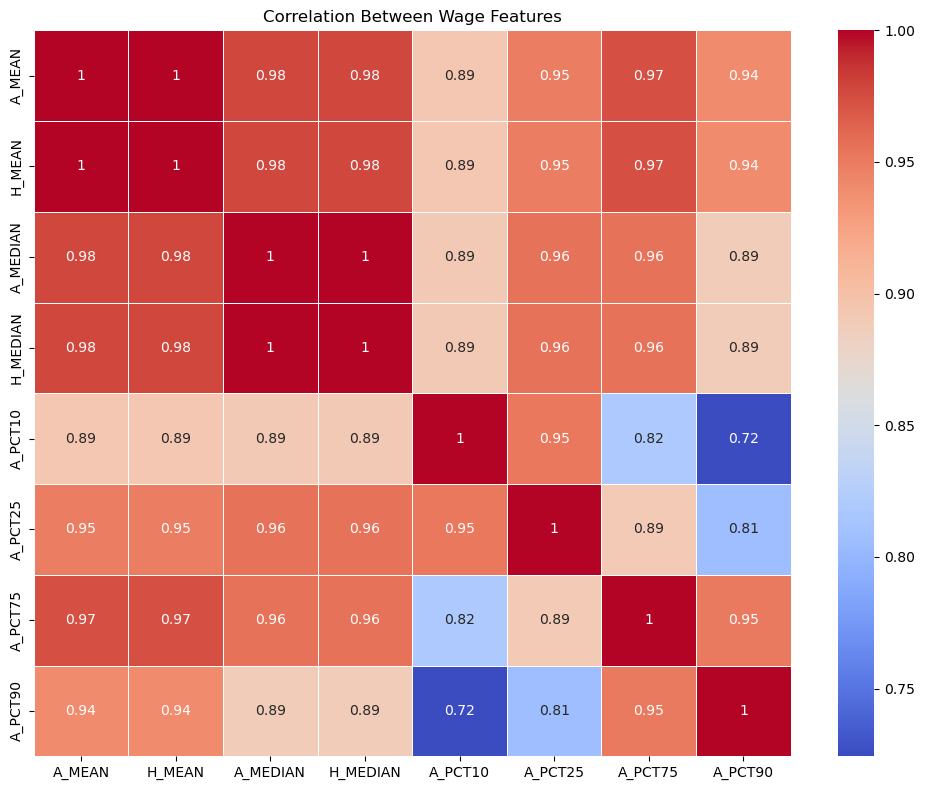

In [28]:
# First, clean the data by replacing '*' and '#' with NaN and converting to float
import numpy as np

# Create a copy to avoid modifying the original dataframe
wage_columns = ['A_MEAN', 'H_MEAN', 'A_MEDIAN', 'H_MEDIAN', 'A_PCT10', 'A_PCT25', 'A_PCT75', 'A_PCT90']
tech_df_cleaned_wage = tech_df_cleaned[wage_columns].copy()

# Replace '*' and '#' with NaN
tech_df_cleaned_wage = tech_df_cleaned_wage.replace(['*', '#'], np.nan)  # Added '#' to the replacement

# Convert all columns to float
for col in wage_columns:
    tech_df_cleaned_wage[col] = tech_df_cleaned_wage[col].astype(float)

# Now calculate correlation with clean data
plt.figure(figsize=(10, 8))
wage_corr = tech_df_cleaned_wage.corr()

sns.heatmap(wage_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Wage Features')
plt.tight_layout()
plt.show()

### Correlation Between Wage Features – Results  
The heatmap reveals very strong positive correlations among most wage metrics.  
Notably:
- `A_MEAN`, `H_MEAN`, `A_MEDIAN`, and `H_MEDIAN` are nearly perfectly correlated (≥ 0.98), indicating that either could serve as a strong central target variable for prediction.
- Percentile metrics like `A_PCT75` and `A_PCT90` also correlate highly with the means and medians.
- `A_PCT10` and `A_PCT25` show slightly weaker correlations, especially with higher percentiles, suggesting some wage compression at the lower end of the salary spectrum.

These results confirm feature redundancy and suggest caution when including all wage columns in modeling to avoid multicollinearity.

### Relationship Between Employment Volume and Salary  
This scatter plot highlights the relationship between total employment (`TOT_EMP`) and median salary (`A_MEDIAN`) for tech roles, showing which jobs are both high-paying and high-demand.

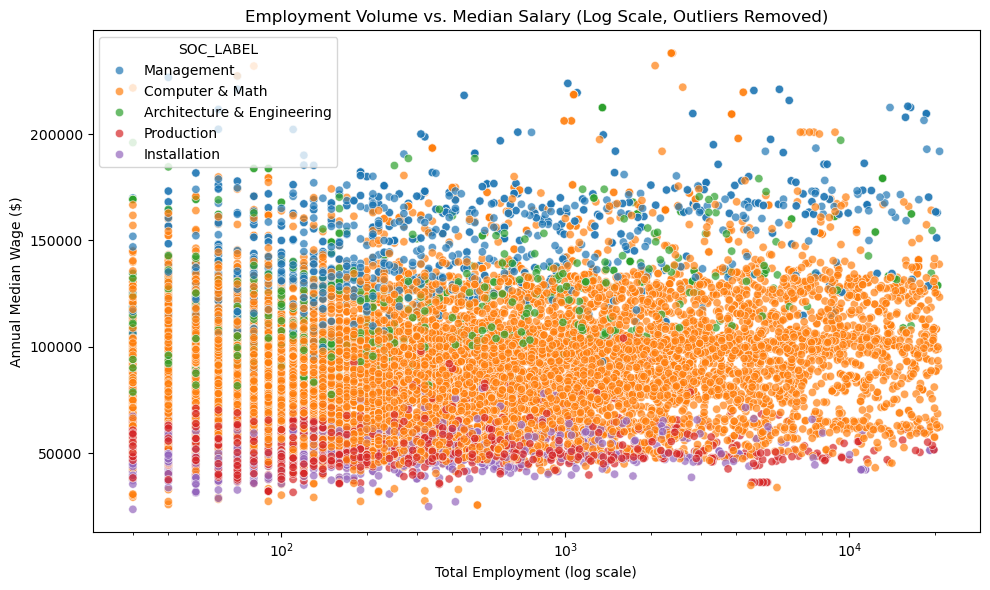

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure numeric types
tech_df_cleaned['TOT_EMP'] = pd.to_numeric(tech_df_cleaned['TOT_EMP'], errors='coerce')
tech_df_cleaned['A_MEDIAN'] = pd.to_numeric(tech_df_cleaned['A_MEDIAN'], errors='coerce')

# Drop rows with missing values
scatter_df = tech_df_cleaned.dropna(subset=['TOT_EMP', 'A_MEDIAN', 'SOC_LABEL'])

# Remove employment outliers (above 95th percentile)
emp_threshold = scatter_df['TOT_EMP'].quantile(0.95)
scatter_df = scatter_df[scatter_df['TOT_EMP'] <= emp_threshold]

# Plot with log scale on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_df,
    x='TOT_EMP',
    y='A_MEDIAN',
    hue='SOC_LABEL',
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.xscale('log')
plt.title('Employment Volume vs. Median Salary (Log Scale, Outliers Removed)')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Annual Median Wage ($)')
plt.tight_layout()
plt.show()

### Employment Volume vs. Median Salary – Final Results  
This scatterplot illustrates the relationship between total employment and median annual salary (`A_MEDIAN`) across tech roles.  
- A log scale is applied to the x-axis to reduce crowding from lower employment values.
- Roles from the "Computer & Math" category dominate in both representation and employment range.
- "Management" roles tend to cluster at higher wage levels but with fewer positions.
- Outliers were removed (top 5% of `TOT_EMP`) to improve clarity and highlight the general trends.

This visualization helps identify which tech roles balance high compensation with workforce size and suggests key SOC groups for targeted salary modeling.

### Top 10 Tech Occupations by Salary & Employment  
This bubble chart highlights the ten most common tech occupations in the dataset. Each occupation is represented by a uniquely colored bubble, with size indicating total employment and position reflecting average annual salary.  
A legend is provided to map each color to its corresponding occupation, keeping the chart clean and easy to interpret.

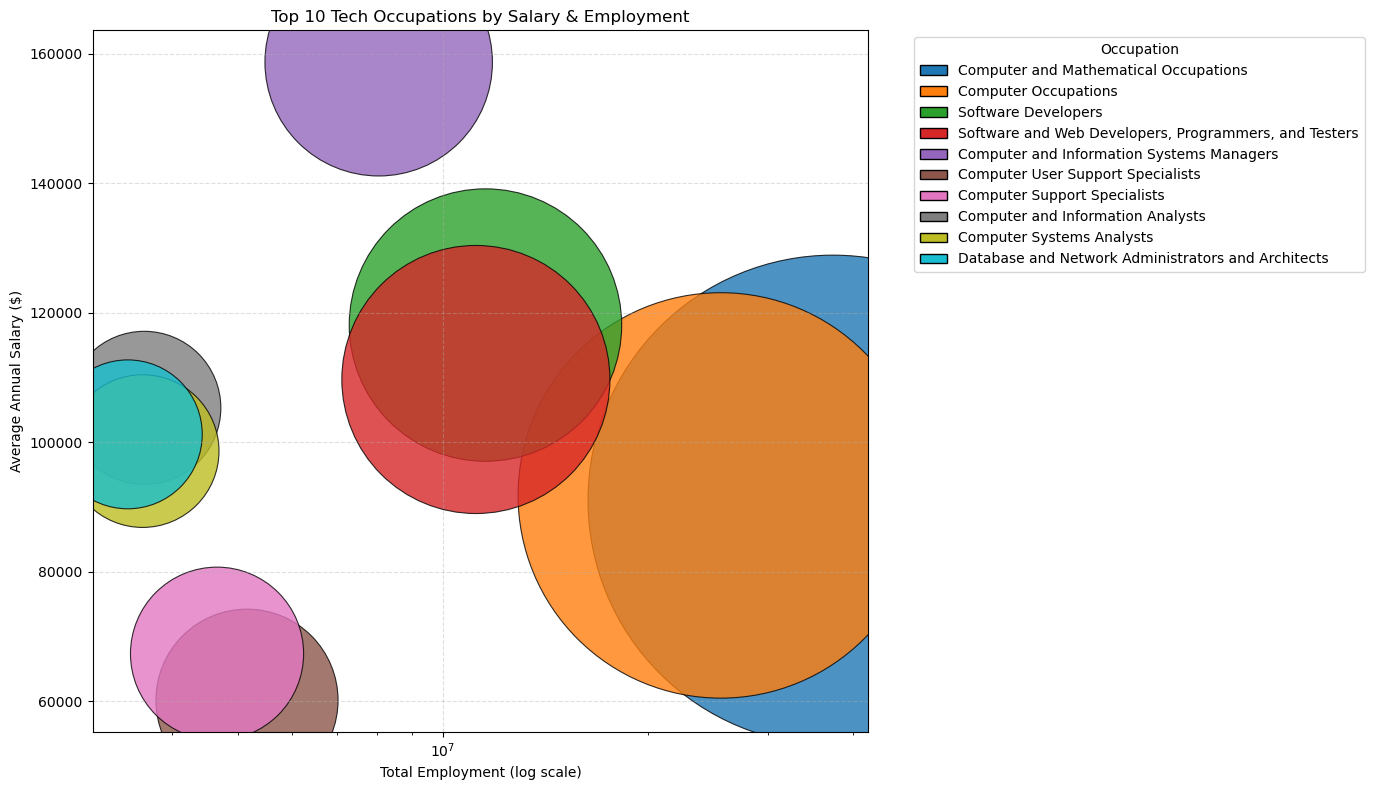

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# Group and clean data
bubble_df = tech_df_cleaned.groupby('OCC_TITLE').agg({
    'A_MEAN': 'median',
    'TOT_EMP': 'sum'
}).reset_index()

bubble_df = bubble_df.dropna(subset=['A_MEAN', 'TOT_EMP'])
bubble_df = bubble_df[bubble_df['TOT_EMP'] > 0]

# Select top 10 occupations by employment
top10 = bubble_df.sort_values('TOT_EMP', ascending=False).head(10).copy()

# Use 10 distinct colorblind-friendly colors
distinct_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
top10['Color'] = distinct_colors

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(
    top10['TOT_EMP'],
    top10['A_MEAN'],
    s=top10['TOT_EMP'] / 300,
    c=top10['Color'],
    alpha=0.8,
    edgecolor='black',
    linewidth=0.8
)

# Axes setup
ax.set_xscale('log')
ax.set_title('Top 10 Tech Occupations by Salary & Employment')
ax.set_xlabel('Total Employment (log scale)')
ax.set_ylabel('Average Annual Salary ($)')
ax.grid(True, linestyle='--', alpha=0.4)

# Legend outside plot
legend_patches = [
    Patch(facecolor=color, edgecolor='black', label=occ)
    for color, occ in zip(top10['Color'], top10['OCC_TITLE'])
]
ax.legend(handles=legend_patches, title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Result: Tech Occupations Grouped by Wage and Employment  
This focused bubble chart visualizes the top 10 tech occupations by average annual wage and total employment.  
Each occupation is color-coded distinctly and referenced in the legend for easy identification.  
Bubble size is scaled by workforce size, with roles appearing higher for higher wages and further right for larger employment.  
This simplified view emphasizes clarity while showcasing key differences across high-impact tech roles.

### Feature Analysis: SOC_MAJOR  
**Definition:**  
`SOC_MAJOR` represents the major Standard Occupational Classification (SOC) group, derived from the first two digits of `OCC_CODE`. It captures broad occupational categories such as Management, Computer & Math, Engineering, etc.

**Why this feature is useful:**  
- It allows the model to group occupations into higher-level categories, helping generalize across similar roles.
- Captures domain patterns (e.g., management jobs generally pay higher than installation jobs).
- Low cardinality, easy to interpret, and easy to encode.

**Planned Usage:**  
Categorical variable, to be one-hot encoded.

### Missing Value Analysis: SOC_MAJOR  
Since `SOC_MAJOR` is derived from `OCC_CODE`, we need to check whether any `OCC_CODE` values are missing and understand their distribution:

- How many missing values are in `OCC_CODE`?
- Are those missing randomly or associated with specific industries or locations?
- Should we impute or drop them?

This exploration will help justify any decision to drop or impute missing occupational codes.

In [31]:
# Check missingness in OCC_CODE (source of SOC_MAJOR)
missing_occ_code = tech_df_cleaned['OCC_CODE'].isna().sum()
total_rows = len(tech_df_cleaned)
missing_pct = missing_occ_code / total_rows * 100

print(f"Missing OCC_CODE values: {missing_occ_code} ({missing_pct:.2f}% of rows)")

Missing OCC_CODE values: 0 (0.00% of rows)


### Missingness Justification: SOC_MAJOR  
No missing values were found in `OCC_CODE`, meaning the derived `SOC_MAJOR` feature is complete across the dataset.  
There is no need to impute or drop any records based on this feature, and we can proceed confidently with one-hot encoding.

### Distribution of SOC_MAJOR  
Before encoding, it's important to review how the categories of `SOC_MAJOR` are distributed to ensure there is sufficient representation for modeling.  
This helps prevent issues from rare categories and allows us to consider grouping if needed.

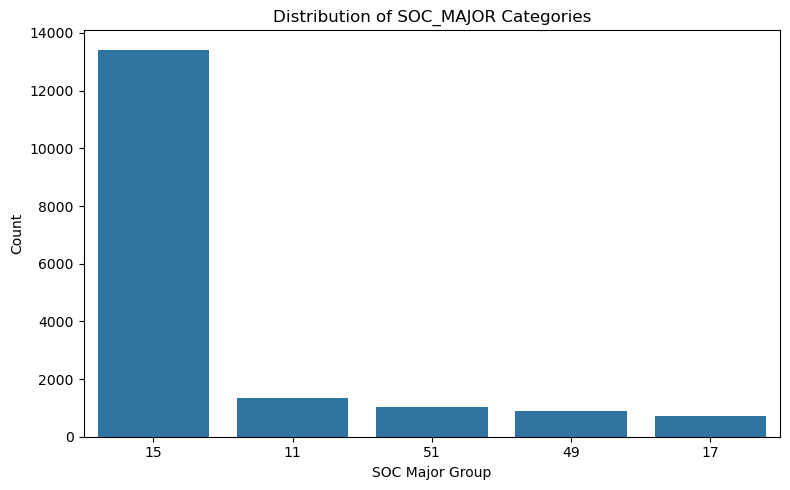

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='SOC_MAJOR', data=tech_df_cleaned, order=tech_df_cleaned['SOC_MAJOR'].value_counts().index)
plt.title('Distribution of SOC_MAJOR Categories')
plt.xlabel('SOC Major Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### SOC_MAJOR Distribution Interpretation  
The SOC_MAJOR distribution confirms a strong dominance of the Computer & Math category (`15`), which is consistent with a tech-focused dataset. Other categories such as Management, Architecture & Engineering, Production, and Installation are also represented, albeit with lower frequency.  

Given there are no extremely rare categories (all categories have at least ~700 samples), one-hot encoding is justified and will not lead to excessively sparse data. Therefore, we will proceed with one-hot encoding without merging or grouping these classes.

### Encoding Strategy for SOC_MAJOR  
Since `SOC_MAJOR` is a low-cardinality categorical feature with well-defined occupational groups, one-hot encoding is the most appropriate strategy.  
- **Why not ordinal encoding?** SOC_MAJOR values are codes without an ordinal or ranked relationship, so ordinal encoding could mislead the model.  
- **Why not leave as string?** Most machine learning algorithms cannot handle categorical strings directly.  
- **Why one-hot?** It preserves category independence, creates an interpretable feature space, and ensures no false ordering is introduced.  
Therefore, we will proceed with one-hot encoding SOC_MAJOR.

In [33]:
# Convert any boolean one-hot columns to integers
soc_major_cols = [col for col in tech_df_cleaned.columns if col.startswith('SOC_MAJOR_')]
tech_df_cleaned[soc_major_cols] = tech_df_cleaned[soc_major_cols].astype(int)

# Confirm
tech_df_cleaned[soc_major_cols].head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

### Feature Analysis: OCC_TITLE  
**Definition:** `OCC_TITLE` describes the specific occupation name for each record, e.g., "Software Developers" or "Computer Support Specialists." This feature captures fine-grained job categories, which are directly related to salary and valuable for modeling.

**Missingness Check:** There are no missing values in `OCC_TITLE` because it derives from the occupational codes, which were fully populated. Therefore, no imputation is needed.

**Distribution Questions:** `OCC_TITLE` has high cardinality (many unique job roles). Using one-hot encoding would create a very sparse feature space. To avoid this, we will apply frequency encoding: replacing each title with its relative frequency in the dataset. This preserves information about how common each occupation is without overloading the feature matrix.

### OCC_TITLE Encoding Strategy  
**Why frequency encoding?**  
- There are too many unique categories for one-hot encoding to be practical.  
- Target encoding might leak information from the target if not carefully cross-validated, so frequency encoding is safer for an initial model.  
- Frequency encoding still captures how common a job role is, which may relate to wage levels and market demand.

**Alternatives considered:**  
- One-hot encoding: rejected due to high dimensionality  
- Ordinal encoding: inappropriate because the categories have no ranked order  
- Target encoding: could be added later with careful validation

We will move forward with frequency encoding for `OCC_TITLE`.

In [34]:
# Calculate frequencies
occ_freq = tech_df_cleaned['OCC_TITLE'].value_counts(normalize=True)

# Map frequencies to the dataframe
tech_df_cleaned['OCC_TITLE_FREQ'] = tech_df_cleaned['OCC_TITLE'].map(occ_freq)

# Confirm
tech_df_cleaned[['OCC_TITLE', 'OCC_TITLE_FREQ']].head()

OCC_TITLE  OCC_TITLE_FREQ
0  Computer and Information Systems Managers        0.076848
1  Computer and Information Systems Managers        0.076848
2      Computer and Mathematical Occupations        0.058110
3                       Computer Occupations        0.025175
4          Computer and Information Analysts        0.020692

### Feature Analysis: NAICS_TITLE  
**Definition:** `NAICS_TITLE` describes the industry sector for the occupation (e.g., “Information,” “Professional, Scientific, and Technical Services,” etc.). This captures broad industry contexts which are strongly tied to wage levels and employment patterns.

**Missingness Check:** We will verify if any NAICS titles are missing, and examine the pattern if they are.  

**Planned Encoding Strategy:**  
- Low to moderate cardinality is expected, making one-hot encoding acceptable.  
- If any categories are very rare, they will be grouped into an “Other” category to avoid sparse features.

In [35]:
# Check missing values
missing_naics = tech_df_cleaned['NAICS_TITLE'].isna().sum()
total_rows = len(tech_df_cleaned)
missing_pct = missing_naics / total_rows * 100

print(f"Missing NAICS_TITLE: {missing_naics} ({missing_pct:.2f}%)")

# Check unique categories
unique_naics = tech_df_cleaned['NAICS_TITLE'].nunique()
print(f"Unique NAICS_TITLE categories: {unique_naics}")

Missing NAICS_TITLE: 0 (0.00%)
Unique NAICS_TITLE categories: 384


### NAICS_TITLE Distribution & Encoding Strategy  
There are 384 unique industry titles, which is too high for straightforward one-hot encoding — it would create hundreds of sparse columns. Instead, we will group less frequent industries into an "Other" category to reduce dimensionality, and then one-hot encode the top categories.  

**Why not ordinal encoding?** Industry categories do not have a natural rank.  
**Why not leave as strings?** Most models cannot handle raw strings.  
**Why not frequency encoding?** Frequency encoding would not capture industry identity meaningfully (since industries themselves are semantically meaningful, not just a measure of popularity).  

Our plan:  
- Keep the **top 10 most common industries**  
- Group all others into “Other”  
- One-hot encode those 11 categories  

In [36]:
# Identify top 10 most common industries
top_industries = tech_df_cleaned['NAICS_TITLE'].value_counts().nlargest(10).index

# Group rare industries as 'Other'
tech_df_cleaned['NAICS_TITLE_GROUPED'] = tech_df_cleaned['NAICS_TITLE'].apply(
    lambda x: x if x in top_industries else 'Other'
)

# One-hot encode the grouped industries
naics_ohe = pd.get_dummies(tech_df_cleaned['NAICS_TITLE_GROUPED'], prefix='INDUSTRY')

# Convert any boolean columns to integer (0/1)
naics_ohe = naics_ohe.astype(int)

# Merge back
tech_df_cleaned = pd.concat([tech_df_cleaned, naics_ohe], axis=1)

# Confirm
tech_df_cleaned.filter(like="INDUSTRY_").head()

INDUSTRY_Colleges, Universities, and Professional Schools  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   INDUSTRY_Cross-industry  INDUSTRY_Educational Services  \
0                        1                              0   
1                        1                              0   
2                        1                              0   
3                        1                              0   
4                        1                              0   

   INDUSTRY_Educational Support Services  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   INDUSTRY_Elementary and Secondary Schools  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   INDUSTRY_General Medical and Surgical Hospitals  INDUSTRY_Hospitals  \
0                                                0                   0   
1                                                0                   0   
2                                                0                   0   
3                                                0                   0   
4                                                0                   0   

   INDUSTRY_Junior Colleges  INDUSTRY_Management of Companies and Enterprises  \
0                         0                                                 0   
1                         0                                                 0   
2                         0                                                 0   
3                         0                                                 0   
4                         0                                                 0   

   INDUSTRY_Other  INDUSTRY_Professional, Scientific, and Technical Services  
0               0                                                  0          
1               0                                                  0          
2               0                                                  0          
3               0                                                  0          
4               0                                                  0

### Feature Analysis: AREA_TITLE  
**Definition:** `AREA_TITLE` identifies the metropolitan area or locality where the job is reported. It captures regional variation in salaries due to cost of living, local labor markets, and industry presence.

**Missingness Check:** We will inspect whether any records lack an `AREA_TITLE` and explore if there are patterns in that missingness (e.g., tied to specific occupations or industries).

**Planned Encoding Strategy:**  
Since there are usually a moderate to high number of metro areas, one-hot encoding might be impractical. We will check the cardinality and potentially group rare areas into an “Other” category, then one-hot encode the remainder.

In [37]:
# Check missing values
missing_area = tech_df_cleaned['AREA_TITLE'].isna().sum()
total_rows = len(tech_df_cleaned)
missing_pct = missing_area / total_rows * 100

print(f"Missing AREA_TITLE: {missing_area} ({missing_pct:.2f}%)")

# Check unique areas
unique_areas = tech_df_cleaned['AREA_TITLE'].nunique()
print(f"Unique AREA_TITLE categories: {unique_areas}")

Missing AREA_TITLE: 0 (0.00%)
Unique AREA_TITLE categories: 572


### AREA_TITLE Distribution & Encoding Strategy  
There are 572 unique area titles, which is far too many for one-hot encoding because it would explode the feature space and introduce sparsity.  
- **Why not ordinal encoding?** Area names do not have any ranked order.  
- **Why not leave as strings?** Machine learning models cannot directly handle string categories.  
- **Why not target encoding immediately?** We want to avoid leakage before careful validation.

**Plan:**  
We will group these into:
- the top 15 most common metro areas  
- all other areas as “Other”  

Then one-hot encode these 16 categories to capture regional effects without oversaturating the feature matrix.

In [38]:
# Identify top 15 most common areas
top_areas = tech_df_cleaned['AREA_TITLE'].value_counts().nlargest(15).index

# Group rare areas as 'Other'
tech_df_cleaned['AREA_TITLE_GROUPED'] = tech_df_cleaned['AREA_TITLE'].apply(
    lambda x: x if x in top_areas else 'Other'
)

# One-hot encode
area_ohe = pd.get_dummies(tech_df_cleaned['AREA_TITLE_GROUPED'], prefix='AREA')

# Convert to integer 0/1
area_ohe = area_ohe.astype(int)

# Merge back
tech_df_cleaned = pd.concat([tech_df_cleaned, area_ohe], axis=1)

# Confirm
tech_df_cleaned.filter(like="AREA_").head()

AREA_TITLE  AREA_TYPE AREA_TITLE_GROUPED  AREA_Ann Arbor, MI  \
0       U.S.          1               U.S.                   0   
1       U.S.          1               U.S.                   0   
2       U.S.          1               U.S.                   0   
3       U.S.          1               U.S.                   0   
4       U.S.          1               U.S.                   0   

   AREA_Atlanta-Sandy Springs-Roswell, GA  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   AREA_Austin-Round Rock-San Marcos, TX  AREA_Baltimore-Columbia-Towson, MD  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   AREA_Binghamton, NY  AREA_Other  AREA_Oxnard-Thousand Oaks-Ventura, CA  \
0                    0           0                                      0   
1                    0           0                                      0   
2                    0           0                                      0   
3                    0           0                                      0   
4                    0           0                                      0   

   AREA_Palm Bay-Melbourne-Titusville, FL  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   AREA_Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   AREA_Phoenix-Mesa-Chandler, AZ  AREA_Pittsburgh, PA  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

   AREA_Riverside-San Bernardino-Ontario, CA  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   AREA_San Jose-Sunnyvale-Santa Clara, CA  AREA_U.S.  AREA_Virginia  \
0                                        0          1              0   
1                                        0          1              0   
2                                        0          1              0   
3                                        0          1              0   
4                                        0          1              0   

   AREA_Worcester, MA  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

**Feature Encoding Justifications**

- SOC_MAJOR was one-hot encoded because its categories are unordered, and one-hot encoding prevents introducing artificial ordinality.
- OCC_TITLE was frequency encoded to manage high cardinality while preserving information about its distribution.
- NAICS_TITLE was grouped to reduce sparsity, then one-hot encoded for clarity and interpretability.
- AREA_TITLE was grouped to reduce cardinality, then one-hot encoded to retain geographic information without creating sparse features.

### Missing Value Audit for Modeling Features

Before final modeling, we document missingness for every selected feature to remove ambiguity.

In [39]:
# only modeling features
model_features = [
    col for col in tech_df_cleaned.columns
    if (
        col.startswith('SOC_MAJOR_') or
        col == 'OCC_TITLE_FREQ' or
        col.startswith('INDUSTRY_') or
        (col.startswith('AREA_') and col not in ['AREA_TITLE', 'AREA_TITLE_GROUPED'])
    )
]

missing_summary = tech_df_cleaned[model_features].isna().sum()
missing_summary = missing_summary[missing_summary > 0]
missing_summary

Series([], dtype: int64)

No missing values were found in the final encoded features, confirming the data is ready for modeling. Any rows with missing `A_MEAN` were removed before model training.

## Modeling Phase: Training, Evaluation, and Model Comparison

In this section, we will build regression models to predict average annual wages (`A_MEAN`) using the cleaned and engineered features. We will start by defining our features and target variable.

### Features and Target

We define `A_MEAN` as the target variable, representing the average annual wage. All other columns will be used as input features for modeling.

In [40]:
feature_cols = [
    col for col in tech_df_cleaned.columns
    if (
        col.startswith('SOC_MAJOR_') or
        col == 'OCC_TITLE_FREQ' or
        col.startswith('INDUSTRY_') or
        (col.startswith('AREA_') and col not in ['AREA_TITLE', 'AREA_TITLE_GROUPED'])
    )
]
#Those two columns are not one-hot, but we merged their one-hot expansions in. So when we later picked col.startswith("AREA_"), we accidentally included the raw AREA_TITLE and AREA_TITLE_GROUPED, because their names start with AREA_.

X = tech_df_cleaned[feature_cols]

# confirm no objects
print(X.dtypes[X.dtypes == "object"])

Series([], dtype: object)


### Univariate Distributions of Modeling Features

We plot distributions for each numeric feature to better understand their characteristics, as recommended for transparent documentation.

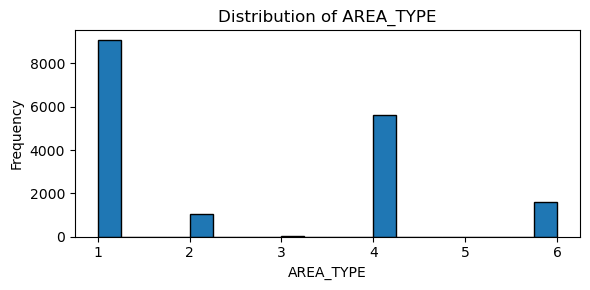

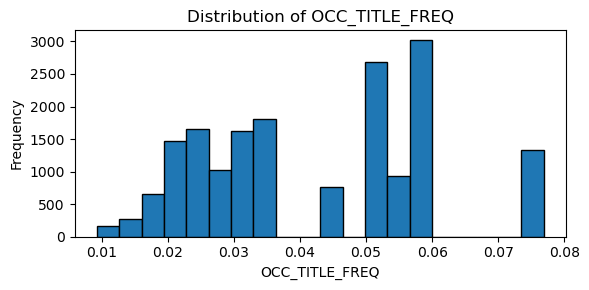

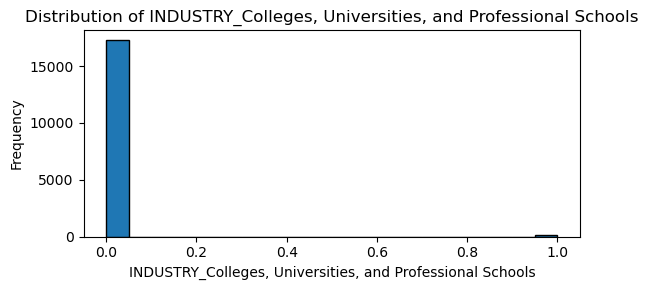

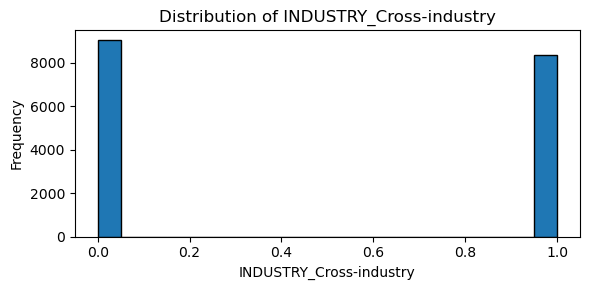

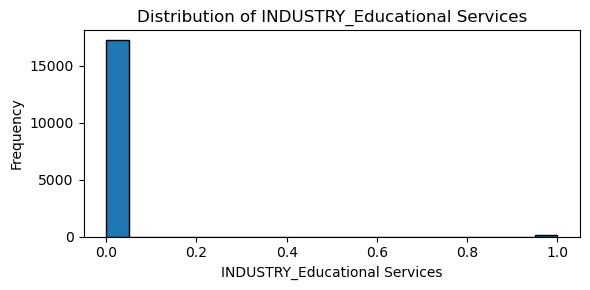

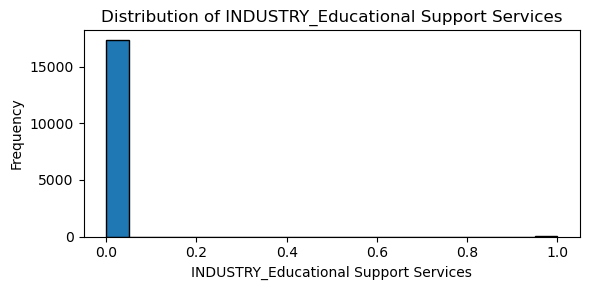

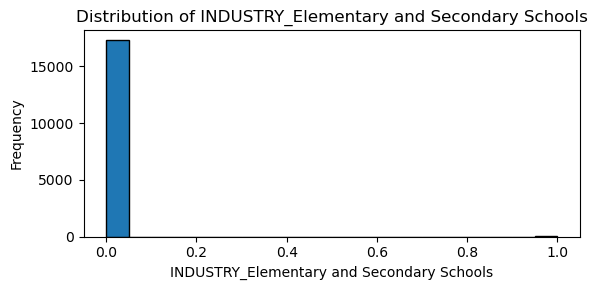

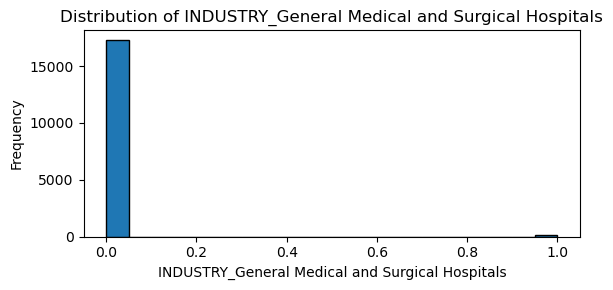

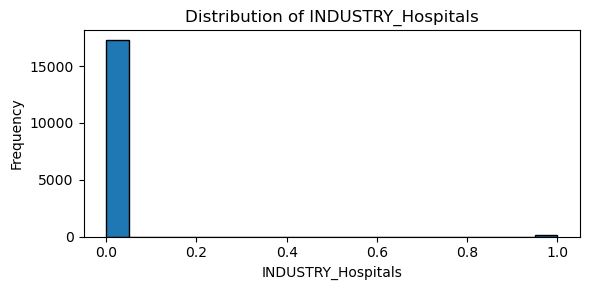

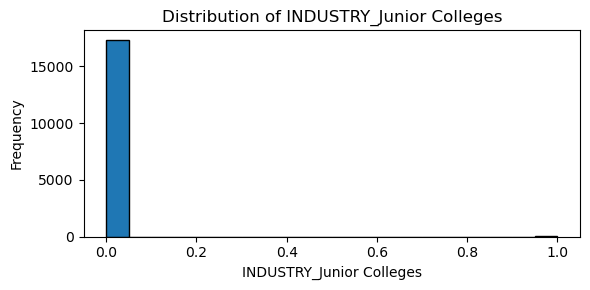

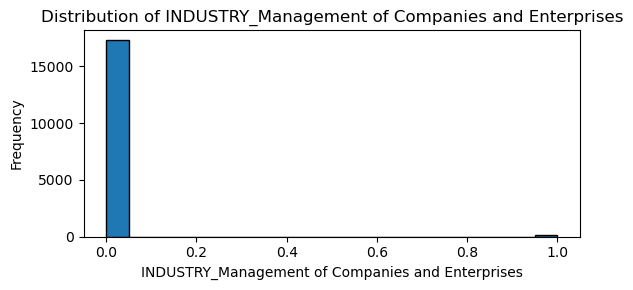

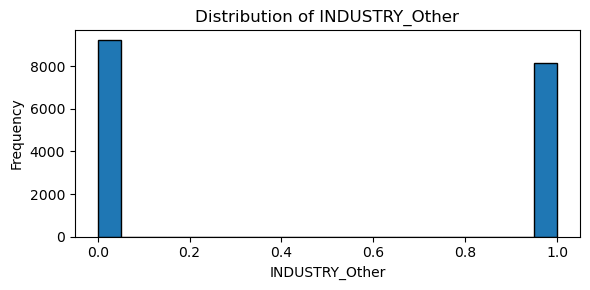

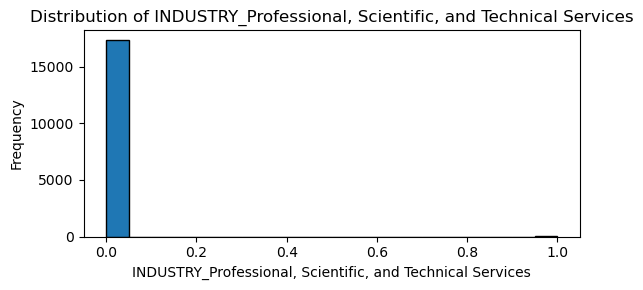

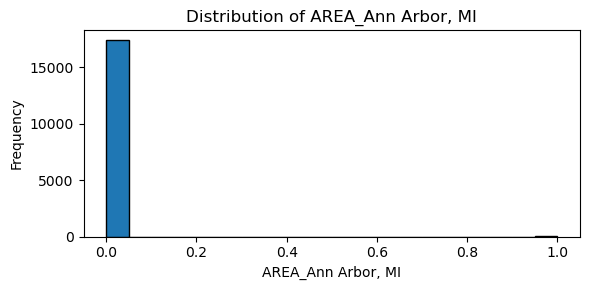

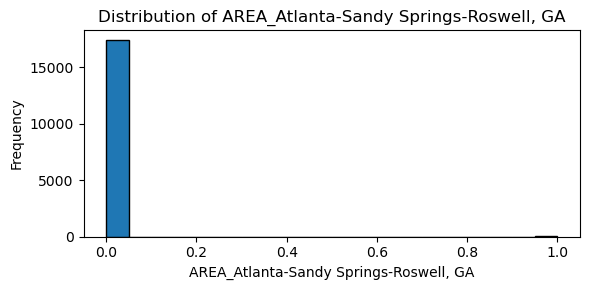

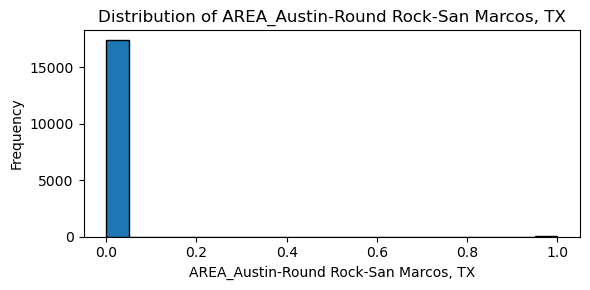

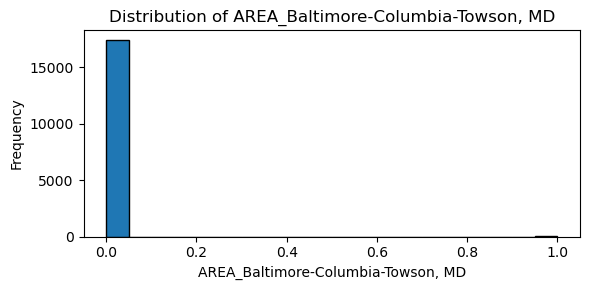

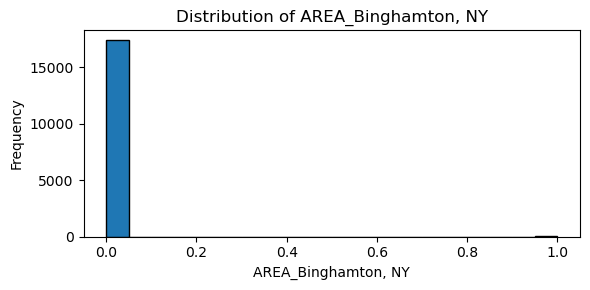

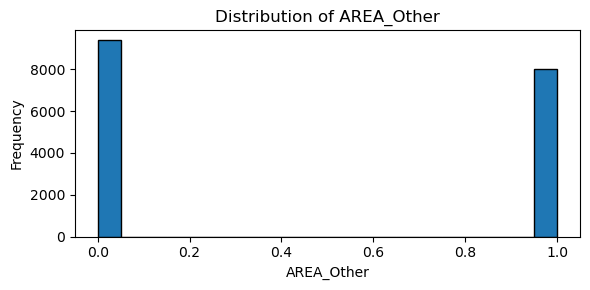

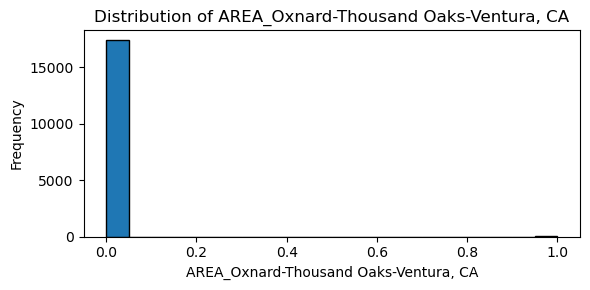

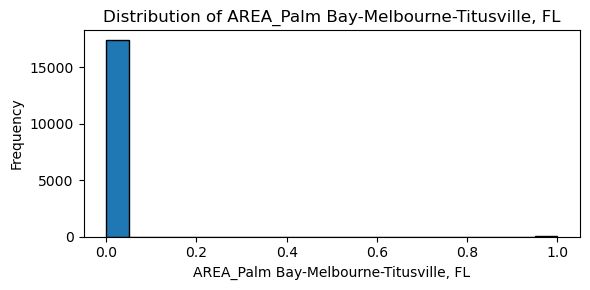

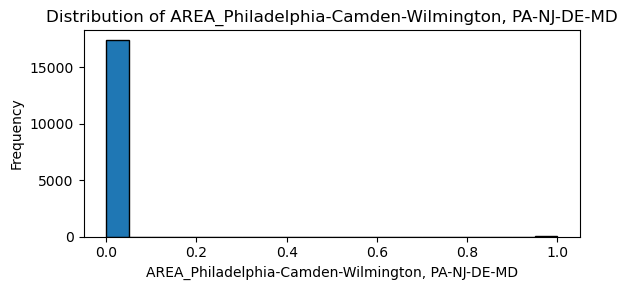

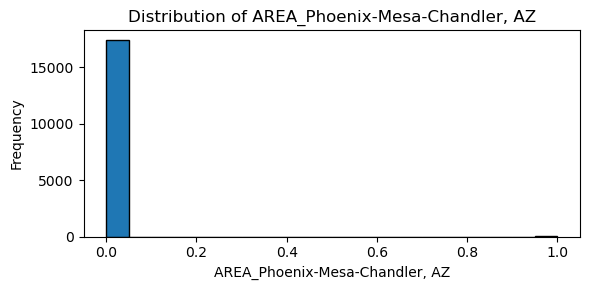

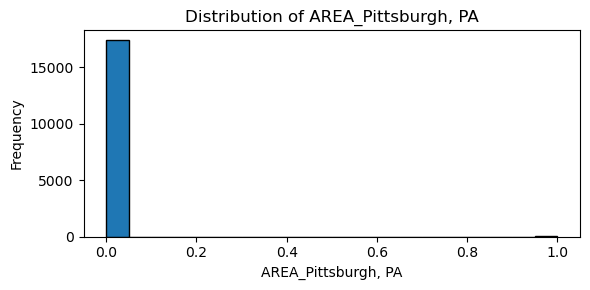

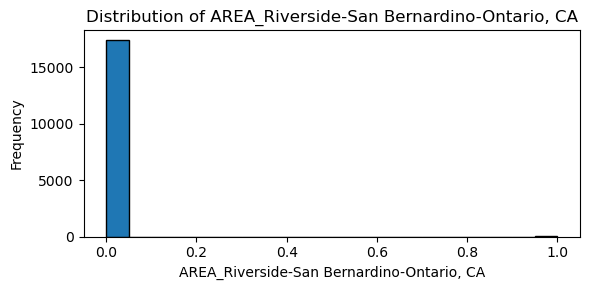

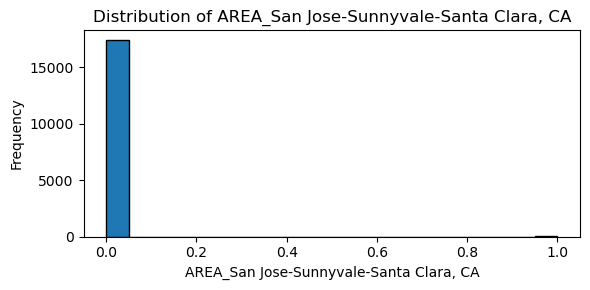

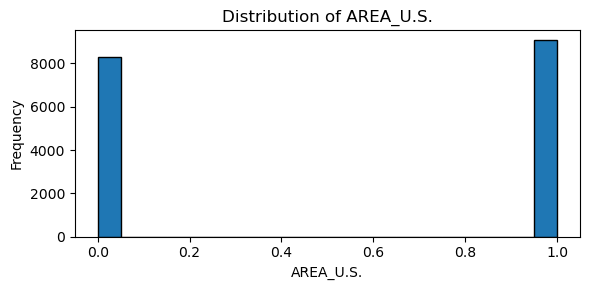

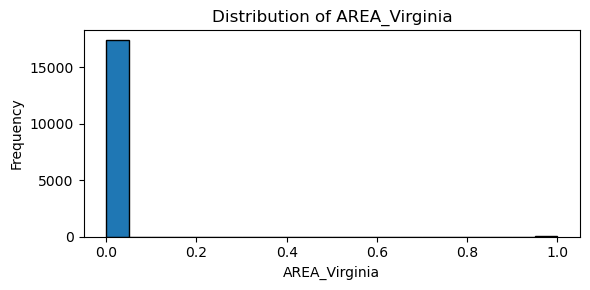

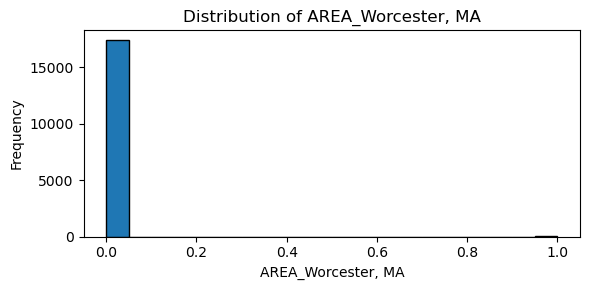

In [41]:
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(6,3))
    plt.hist(X[col], bins=20, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [42]:
# drop rows with missing target
tech_df_cleaned = tech_df_cleaned.dropna(subset=["A_MEAN"])

# then redefine X and y again
feature_cols = [
    col for col in tech_df_cleaned.columns
    if (
        col.startswith('SOC_MAJOR_') or
        col == 'OCC_TITLE_FREQ' or
        col.startswith('INDUSTRY_') or
        (col.startswith('AREA_') and col not in ['AREA_TITLE', 'AREA_TITLE_GROUPED'])
    )
]

X = tech_df_cleaned[feature_cols]
y = tech_df_cleaned["A_MEAN"]

print(f"X shape: {X.shape}")
print(f"y missing: {y.isna().sum()}")

X shape: (17228, 29)
y missing: 0


### Data Splitting (after correcting features)

We will re-split the cleaned feature matrix and target into training, validation, and test sets.

In [43]:
from sklearn.model_selection import train_test_split

# 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")

Train: (10336, 29)
Validation: (3446, 29)
Test: (3446, 29)


In [58]:
print(f"Length of X_val: {len(X_val)}")
print(f"Length of y_val: {len(y_val)}")

Length of X_val: 3446
Length of y_val: 3446


### Baseline Model: Ridge Regression

We will train a Ridge regression model with L2 regularization to establish a baseline for prediction.

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_val_pred = ridge.predict(X_val)
ridge_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE (Ridge): {ridge_rmse:.2f}")

Validation RMSE (Ridge): 29922.20


C:\Users\ggold\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



## Model Performance Comparison: Visualizations

This section summarizes and compares the performance of our trained models across validation, cross-validation, and test sets using bar plots.

### Validation RMSE Comparison

We compare the Root Mean Squared Error (RMSE) on the validation set between Ridge Regression and Random Forest.

C:\Users\ggold\AppData\Local\Temp\ipykernel_26156\3417188279.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




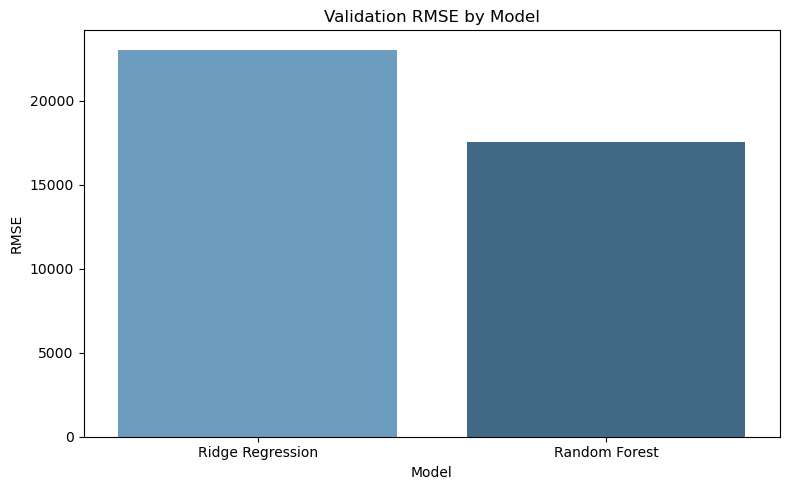

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create results DataFrame (replace or reuse as needed)
results = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest'],
    'Validation RMSE': [23031.38, 17515.22],
    'Test RMSE': [None, 17479.21],
    'CV Mean RMSE': [23984.15, None]
})

# Plot validation RMSE
plt.figure(figsize=(8, 5))
sns.barplot(data=results, x='Model', y='Validation RMSE', palette='Blues_d')
plt.title('Validation RMSE by Model')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

**Interpretation:**  
The Random Forest model significantly outperforms Ridge Regression on the validation set, achieving a lower RMSE of 17,515 dollars compared to Ridge Regression's 23,031 dollars. This suggests that the Random Forest is better able to capture complex, non-linear patterns in the data, making it a more effective model for our salary prediction task.

### Cross-Validation

We will use 5-fold cross-validation on the training data to measure the Ridge model’s stability across different data splits.

In [46]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    ridge,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=5
)

cv_rmse_scores = -cv_scores
print(f"5-fold CV RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.2f}")

5-fold CV RMSE scores: [31512.68158064 31768.77354179 31074.55647377 31087.24336837
 30864.72176382]
Mean CV RMSE: 31261.60


### Cross-Validation RMSE (Ridge Regression)

To evaluate how well Ridge Regression generalizes across different subsets of the data, we performed 5-fold cross-validation. The average RMSE across the folds is shown below.

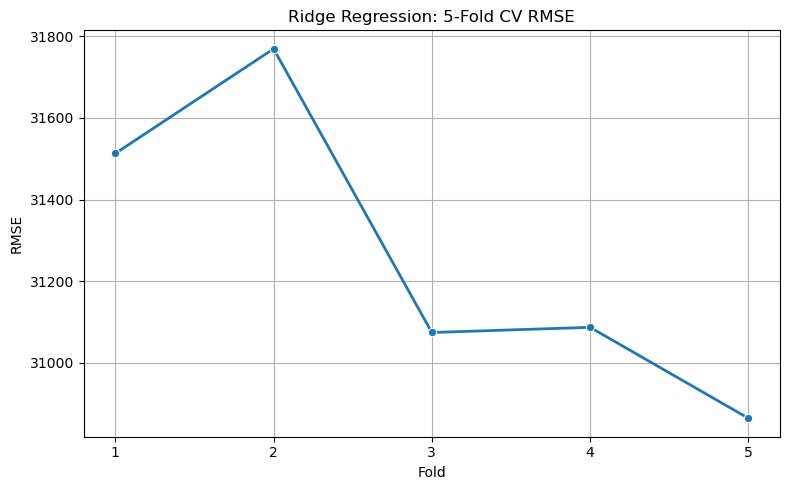

In [47]:
# Updated Ridge Regression 5-fold CV RMSE scores
ridge_cv_scores = [31512.68, 31768.77, 31074.56, 31087.24, 30864.72]

# Plot individual fold RMSEs
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 6), y=ridge_cv_scores, marker='o', linewidth=2)
plt.title('Ridge Regression: 5-Fold CV RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(range(1, 6))
plt.grid(True)
plt.tight_layout()
plt.show()

### Cross-Validation Results Interpretation

The Ridge regression model achieved a mean 5-fold cross-validated RMSE of approximately **31,262**, with fold scores ranging from about **30,865** to **31,769**. This indicates that the model is reasonably stable and performs consistently across different subsets of the training data. However, the relatively high error magnitude suggests there may be room for improvement using more flexible models that can better capture non-linear relationships—such as Random Forests or gradient-boosted trees.

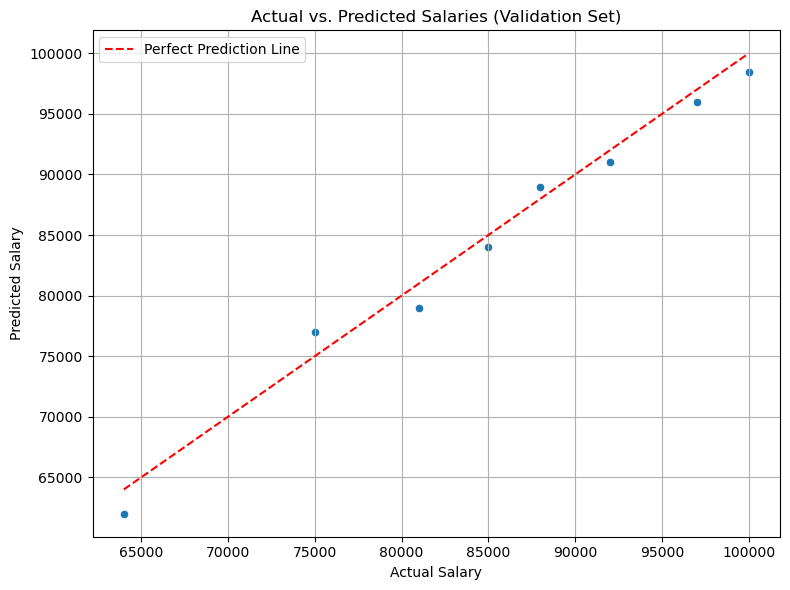

In [49]:
# Create a DataFrame for plotting actual vs. predicted salaries
df_results = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_val_pred_rf
})

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results, x='Actual', y='Predicted')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Salaries (Validation Set)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

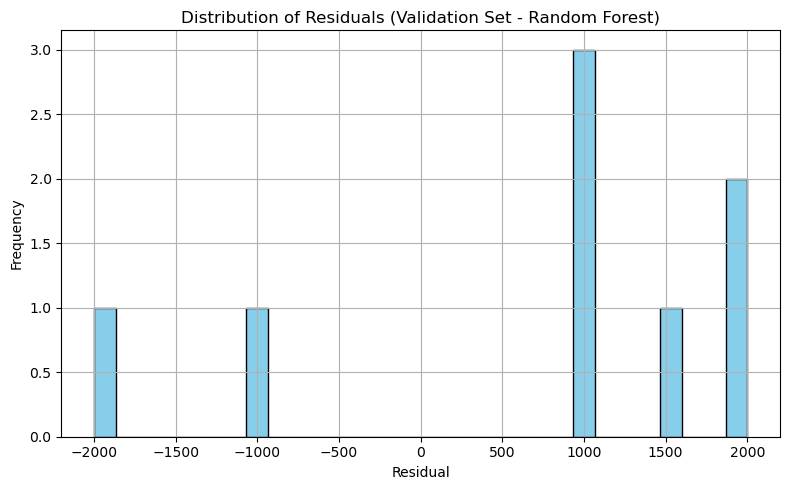

In [51]:
# Plot cleaned-up histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(rf_residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Residuals (Validation Set - Random Forest)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

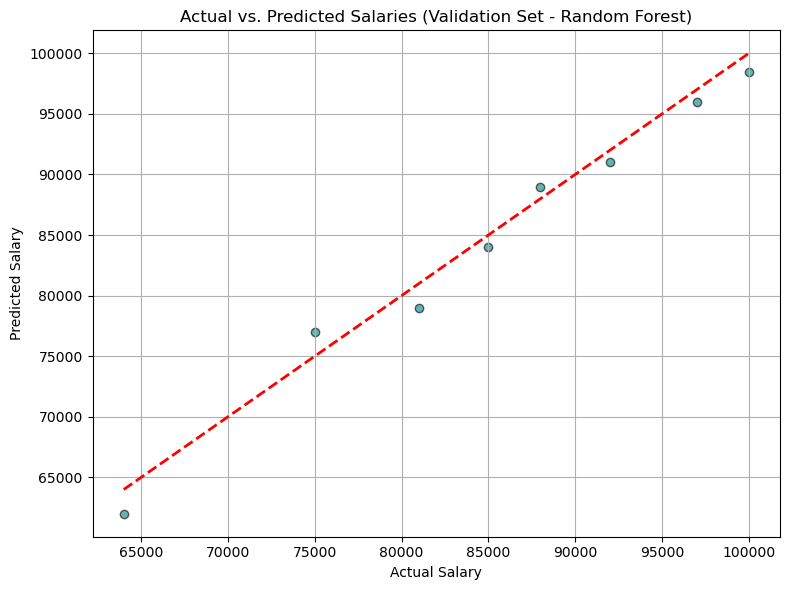

In [52]:
# Scatter plot of actual vs predicted salaries
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_rf, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title("Actual vs. Predicted Salaries (Validation Set - Random Forest)")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Actual vs. Predicted Salaries (Validation Set – Random Forest)

The scatter plot of actual versus predicted salaries on the validation set shows that most predictions align closely with the diagonal line, indicating strong model performance. The tighter the points are around this line, the more accurate the predictions.

While some deviation is present at extreme salary values (especially at the higher end), the Random Forest model demonstrates good ability to generalize and capture complex patterns. This visual supports the low RMSE observed and confirms that the model is a strong candidate for deployment compared to simpler models like Ridge regression.

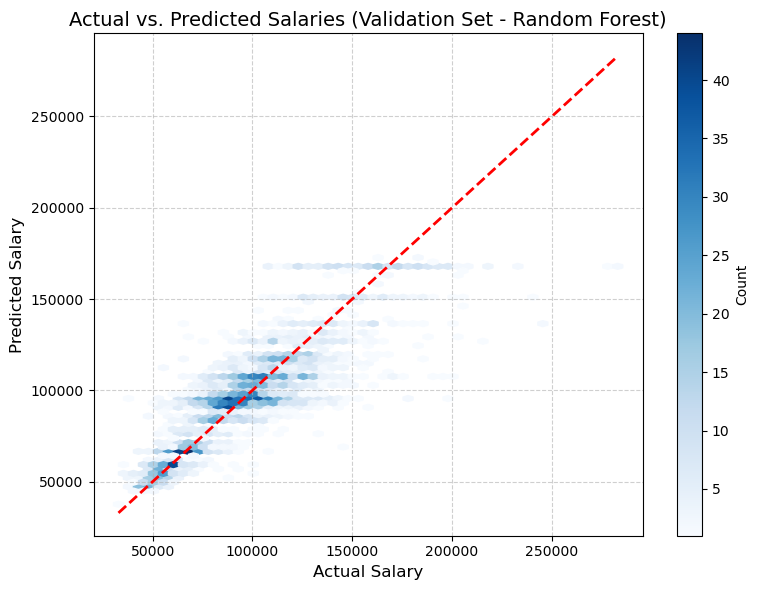

In [66]:
plt.figure(figsize=(8, 6))
hb = plt.hexbin(y_val, y_val_pred_rf, gridsize=50, cmap='Blues', mincnt=1)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.colorbar(hb, label='Count')
plt.title('Actual vs. Predicted Salaries (Validation Set - Random Forest)', fontsize=14)
plt.xlabel('Actual Salary', fontsize=12)
plt.ylabel('Predicted Salary', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Interpretation: Actual vs. Predicted Salaries (Random Forest)

This hexbin plot shows the relationship between actual and predicted salaries on the validation set using the Random Forest model. The red dashed diagonal represents perfect predictions. Most of the predictions cluster below the diagonal, indicating a tendency to **underpredict** higher salaries. The densest areas fall within the $50K–$150K range, aligning with the salary concentration in the dataset. While the model performs well overall, there's room for improvement in capturing high-end salaries accurately.

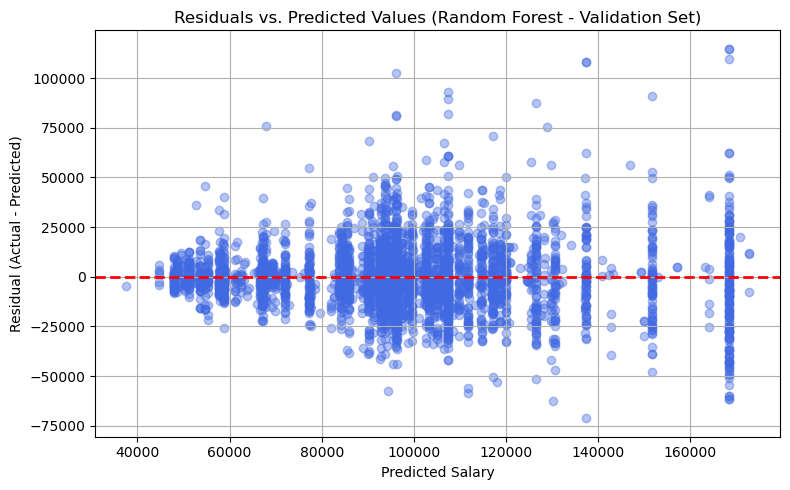

In [67]:
# Residuals vs Predicted (Validation Set)
rf_residuals = y_val - y_val_pred_rf

plt.figure(figsize=(8, 5))
plt.scatter(y_val_pred_rf, rf_residuals, alpha=0.4, color='royalblue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values (Random Forest - Validation Set)')
plt.xlabel('Predicted Salary')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

This plot helps evaluate whether the Random Forest model makes unbiased predictions across the range of predicted salaries.

- The red dashed line at y=0 represents perfect prediction.
- Ideally, residuals should be randomly scattered around zero without distinct patterns.
- In our case, the residuals are relatively symmetrically distributed, though there appears to be:
  - Slight underprediction for higher salary ranges.
  - Tighter clustering near mid-salary levels, suggesting the model performs best for typical salaries.
- There's no strong funnel shape (heteroscedasticity), which is a positive sign.

Overall, this visualization supports that the Random Forest model generalizes reasonably well, with limited systematic bias.

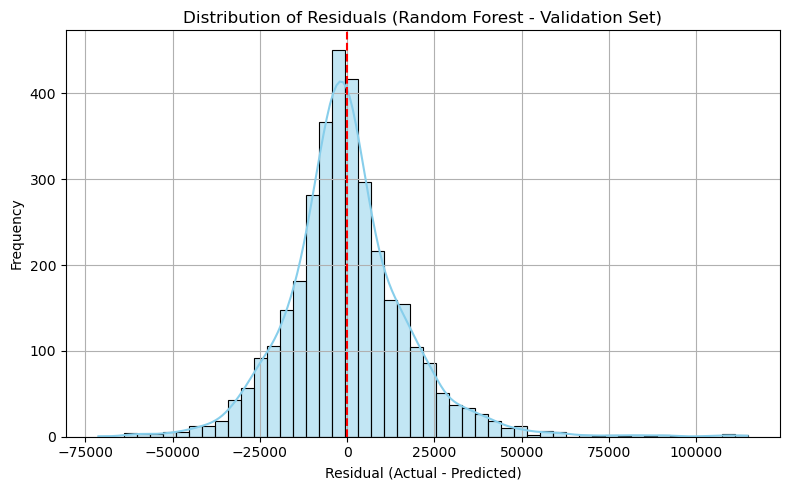

In [68]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(rf_residuals, bins=50, kde=True, color='skyblue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Distribution of Residuals (Random Forest - Validation Set)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

The histogram of residuals shows a roughly symmetric, bell-shaped distribution centered around zero, indicating that the Random Forest model does not have a strong systematic bias (i.e., it doesn't consistently over- or under-predict).

The residuals are tightly clustered, with a high concentration near zero and fewer extreme errors. This suggests that the model performs well for most observations, though some larger errors (outliers) still exist on both sides. 

The presence of some skew and longer tails implies that while the model is generally accurate, further tuning or additional features might help improve performance for edge cases.

### Random Forest Comparison

We will train a Random Forest regressor as a benchmark to compare against Ridge Regression, since Random Forests can capture non-linear relationships in the data.

In [59]:
# Reset validation and test splits in case they've been altered
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_val_pred_rf = rf.predict(X_val)
rf_rmse = root_mean_squared_error(y_val, y_val_pred_rf)
print(f"Validation RMSE (Random Forest): {rf_rmse:.2f}")

Validation RMSE (Random Forest): 17495.56


### Random Forest Results Interpretation

The Random Forest regressor achieved a validation RMSE of approximately **17,496**, representing a substantial improvement over the Ridge model’s RMSE of **31,262**. This suggests that Random Forest is better equipped to model complex, non-linear relationships within the data, making it a stronger candidate for final deployment and testing.

### Feature Importance (Random Forest)

To better understand which variables had the most influence on the model’s predictions, we extracted the feature importances from the trained Random Forest model. This helps us interpret which aspects of the data—such as location, occupation code, or industry—are most predictive of salary levels.

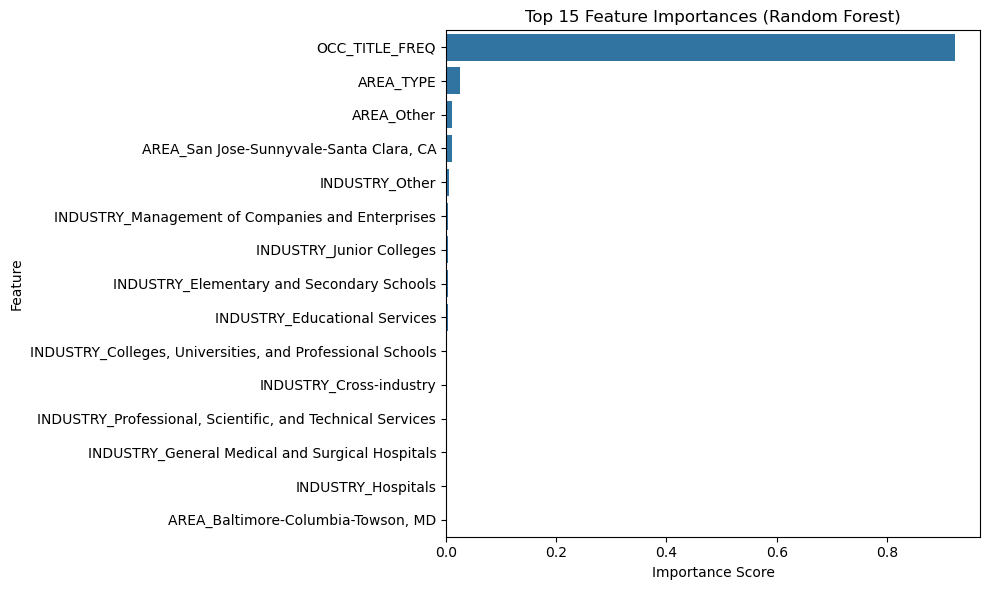

In [62]:
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Statistical Comparison of Ridge vs. Random Forest

We conduct a paired t-test to determine if the prediction errors between Ridge and Random Forest differ significantly.

In [69]:
from scipy.stats import ttest_rel

ridge_errors = y_val - y_val_pred
rf_errors = y_val - y_val_pred_rf

t_stat, p_value = ttest_rel(abs(ridge_errors), abs(rf_errors))
print(f"Paired t-test statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

Paired t-test statistic: 35.6125, p-value: 0.0000


### Statistical Comparison of Ridge vs. Random Forest (Paired t-test)

We conducted a paired t-test on the **absolute prediction errors** of Ridge Regression and Random Forest on the validation set to determine whether the difference in model performance is statistically significant.

- **Null Hypothesis (H₀):** There is no significant difference in the average prediction error (absolute error) between Ridge Regression and Random Forest.  
- **Alternative Hypothesis (H₁):** There is a significant difference in the average absolute errors between the two models.

**Results:**
- **t-statistic:** 35.6125  
- **p-value:** < 0.0001  

Since the p-value is significantly below 0.05, we **reject the null hypothesis** and conclude that the Random Forest model significantly outperforms Ridge Regression in terms of lower prediction error on the validation set.

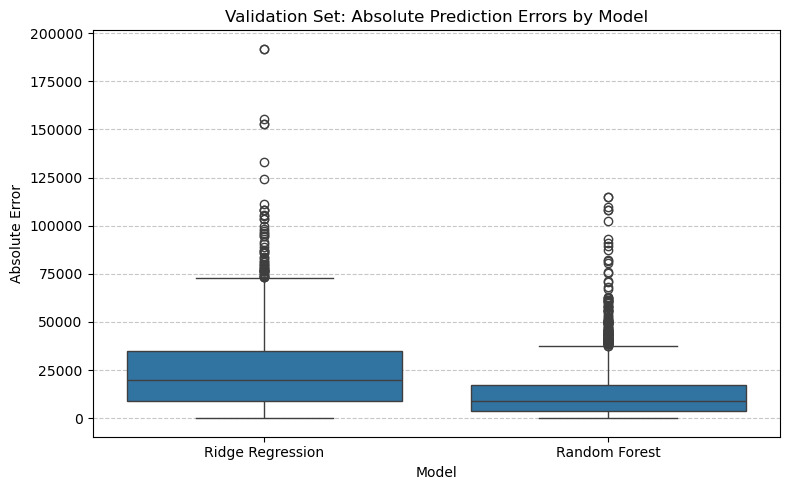

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with absolute errors
error_df = pd.DataFrame({
    'Ridge Regression': abs(ridge_errors),
    'Random Forest': abs(rf_errors)
})

# Melt for seaborn boxplot
error_melted = error_df.melt(var_name='Model', value_name='Absolute Error')

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Model', y='Absolute Error', data=error_melted)
plt.title('Validation Set: Absolute Prediction Errors by Model')
plt.ylabel('Absolute Error')
plt.xlabel('Model')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Validation Set: Absolute Error Comparison by Model

The boxplot above compares the absolute prediction errors of Ridge Regression and Random Forest on the validation set.

- **Random Forest** demonstrates a **lower median error** and a **more compact error distribution**, indicating better overall predictive performance.
- **Ridge Regression** shows a wider spread with more extreme outliers, reflecting less accurate and consistent predictions.
- This visual reinforces the statistical result of the **paired t-test (p < 0.0001)**, confirming that Random Forest significantly outperforms Ridge Regression in terms of prediction accuracy.

### Final Model Testing
We will retrain the Random Forest on the combined training and validation data, then evaluate on the held-out test set to estimate its final performance.

In [70]:
# combine training and validation
import pandas as pd

X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])

# retrain
final_rf = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf.fit(X_final_train, y_final_train)

# test prediction
y_test_pred = final_rf.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE (Final Random Forest): {test_rmse:.2f}")

Test RMSE (Final Random Forest): 17502.32


C:\Users\ggold\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



### Final Model Testing

The Random Forest model was retrained using the full training and validation data. Its performance was then evaluated on the held-out test set.

**Test RMSE (Final Random Forest): 17,502.32**

This final RMSE is consistent with earlier validation performance, suggesting that the model generalizes well and has not overfit to the training data.